In [179]:
#Plik z kodem, na podstawie którego została opracowana
#Praca inżynierska
#"System rekomendacji użytkowników na przykładzie aplikacji randkowych - poprawa preferencji"
#Autor: Marta Kiszka
#W pojedyńczych komórkach kodowych będą oznaczenia, do którego podrozdziału jest wykorzystywany kod

In [180]:
#Ładowanie bibliotek
import pandas as pd
import os
import urllib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import textwrap
from scipy import linalg as la
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Import wskaźnika profilu
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

#Po zakończeniu pracy nad kodem - usunąć biblioteki w dalszych komórkach
#Dodatkowo wszystkie definicje funkcji również dać na górę?

In [181]:
#Ładowanie zbioru

In [182]:
#Komórka kodowa do ładowania plików lokalnie z dysku
'''
OKCUPID_PATH = os.path.join("inzynier")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Data has been loaded successfully.")
        return okcupid_data
    except Exception as e:
        print("Error while loading CSV file:", e)

okcupid_original = load_okcupid_data()
print(okcupid_original)
'''

'\nOKCUPID_PATH = os.path.join("inzynier")\n\ndef load_okcupid_data(okcupid_path=OKCUPID_PATH):\n    csv_path = os.path.join(okcupid_path, "okcupid.csv")\n    try:\n        okcupid_data = pd.read_csv(csv_path)\n        print("Data has been loaded successfully.")\n        return okcupid_data\n    except Exception as e:\n        print("Error while loading CSV file:", e)\n\nokcupid_original = load_okcupid_data()\nprint(okcupid_original)\n'

In [183]:
#Komórka kodowa do ładowania danych w Google Collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
#Komórka kodowa do ładowania danych w Google Collab
OKCUPID_PATH = os.path.join("/content/drive/MyDrive/Do_inżyniera")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Data has been loaded successfully.")
        return okcupid_data
    except Exception as e:
        print("Error while loading CSV file:", e)

okcupid_original = load_okcupid_data()
print(okcupid_original)

Data has been loaded successfully.
       age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                        

In [185]:
#3. Założenia projektowe i plan ramowy projektu

In [186]:
#3.1 Ogólny przegląd zbioru przed ustaleniem dalszych kroków

In [187]:
#Definiowanie customowej funkcji do wyświetlania informacji o zbiorze danych
def print_dataframe_info(dataframe):
    info_df = pd.DataFrame({
        "Column Name": dataframe.columns,
        "Non-Null": dataframe.count(),
        "Dtype": dataframe.dtypes,
        "Uni. Val.": [dataframe[col].nunique() for col in dataframe.columns]
    })

    info_df = print(info_df.reset_index(drop=True))

    num_rows = len(dataframe)
    num_columns = len(dataframe.columns)

    rows_info = print("Number of rows: ", num_rows)
    columns_info = print("Number of columns: ", num_columns)

    return info_df, rows_info, columns_info

In [188]:
#Informacje o zbiorze danych
info_df = print_dataframe_info(okcupid_original)

    Column Name  Non-Null   Dtype  Uni. Val.
0           age     59946   int64         54
1        status     59946  object          5
2           sex     59946  object          2
3   orientation     59946  object          3
4     body_type     54650  object         12
..          ...       ...     ...        ...
26       essay5     49096  object      48961
27       essay6     46175  object      43583
28       essay7     47495  object      45548
29       essay8     40721  object      39323
30       essay9     47343  object      45440

[31 rows x 4 columns]
Number of rows:  59946
Number of columns:  31


In [189]:
#3.2 Histogramy oraz statystyki

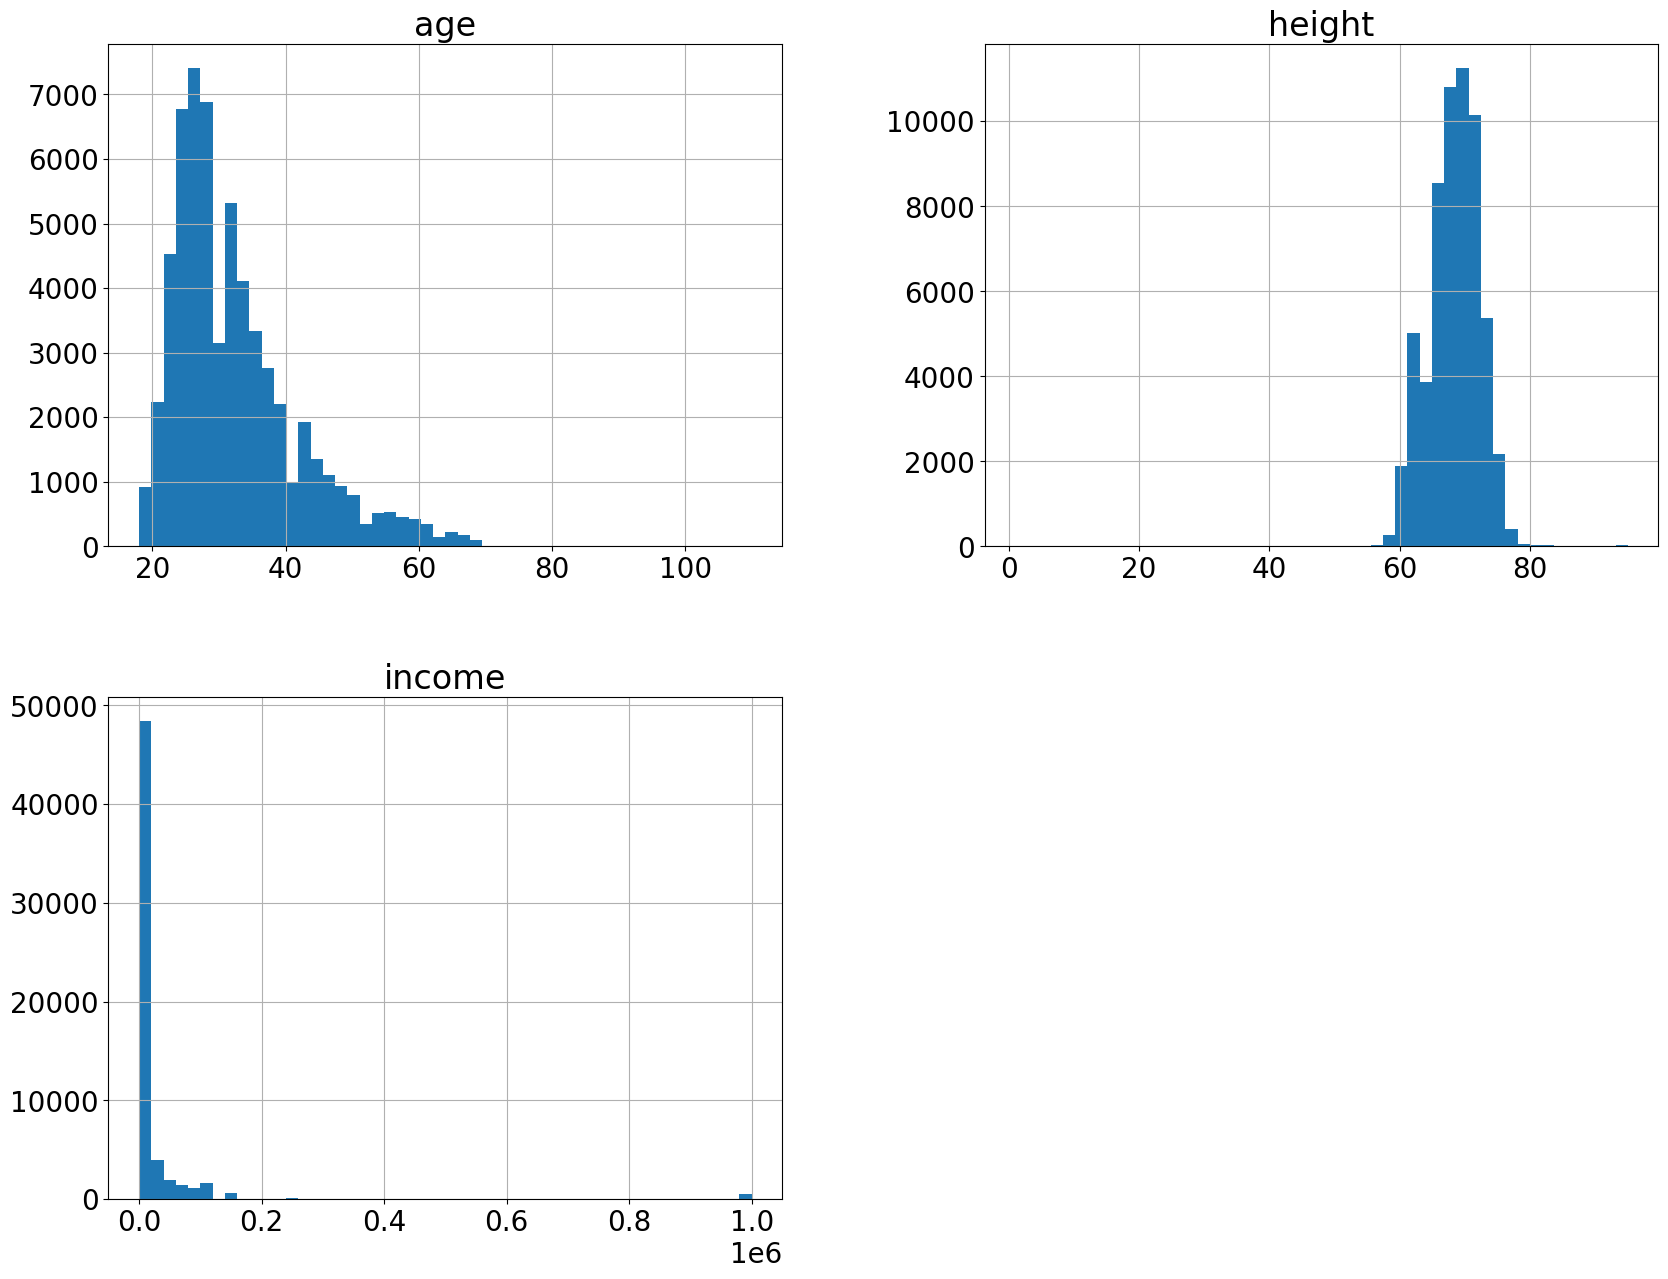

In [190]:
#Histogramy zbioru przed modyfikacjami
#Kolumny numeryczne
%matplotlib inline

plt.rcParams.update({'font.size': 20})

okcupid_original.hist(bins=50, figsize=(20,15))

plt.show()

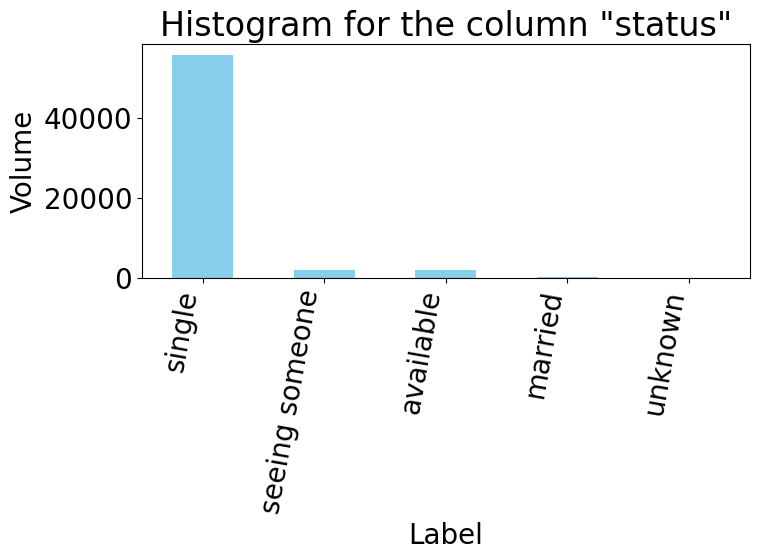

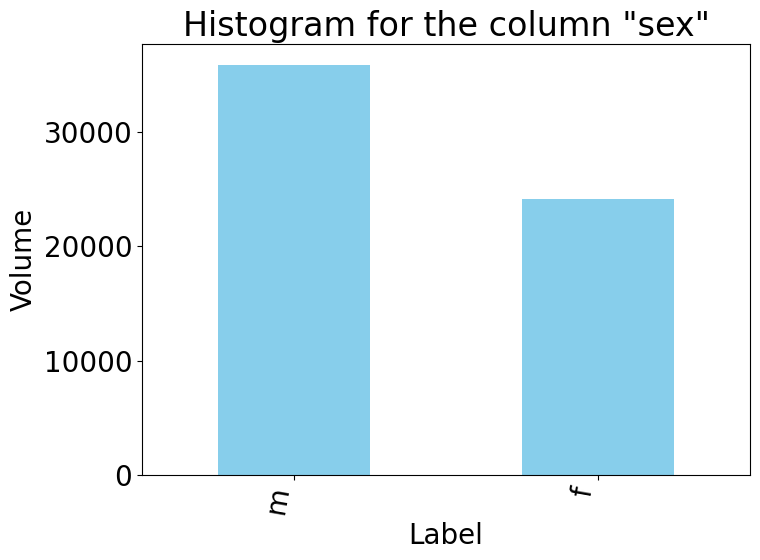

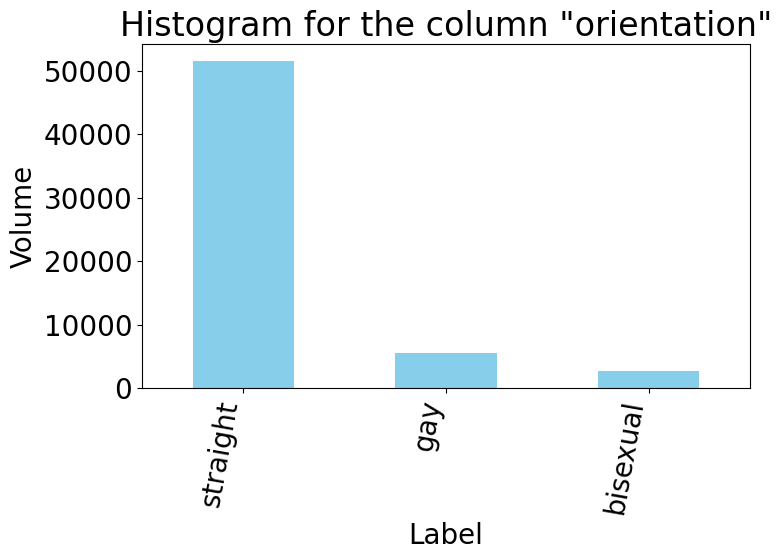

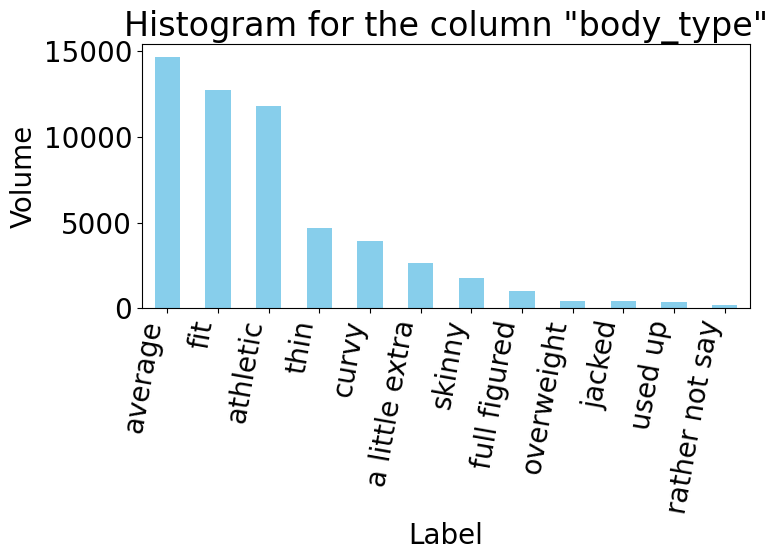

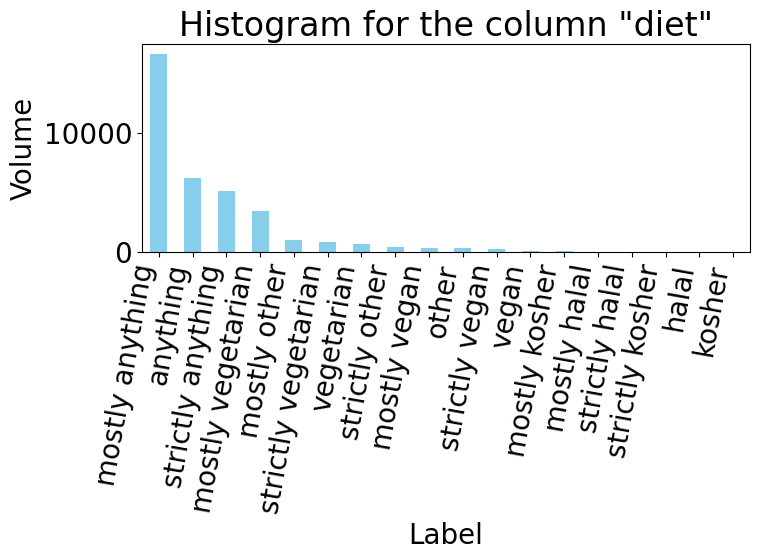

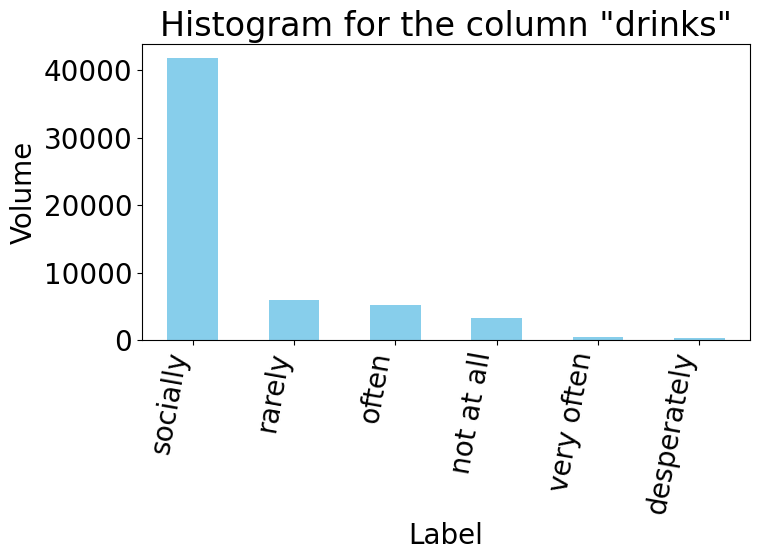

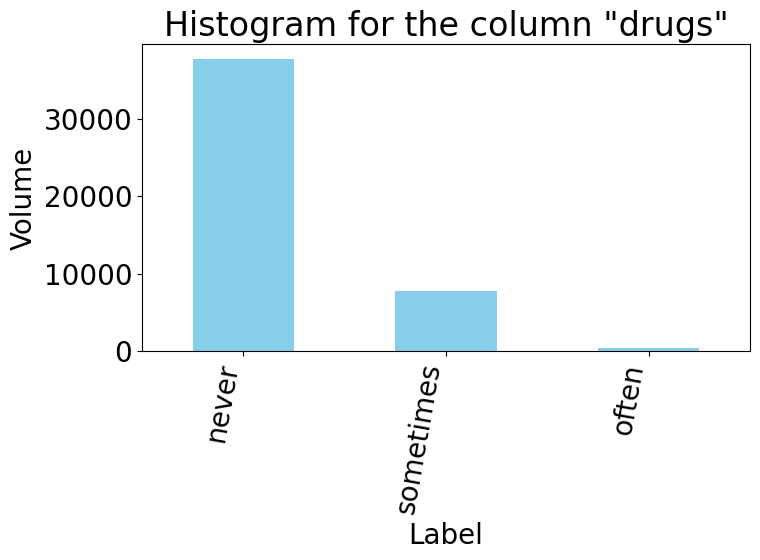

<ipython-input-191-215ed558f815>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


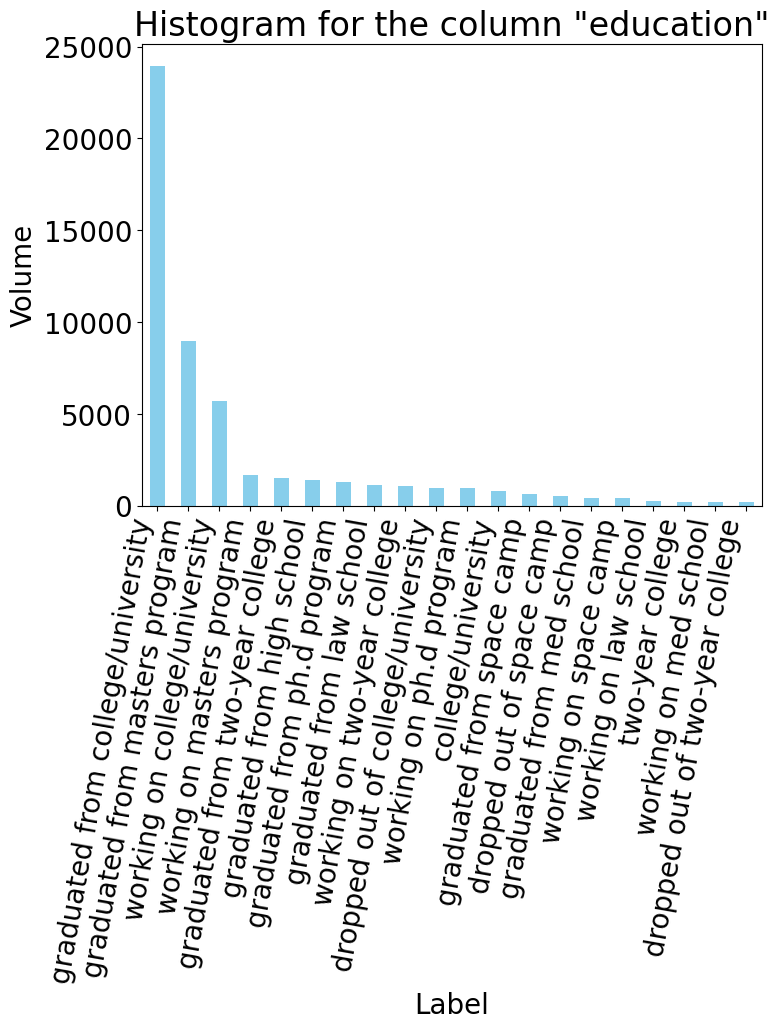

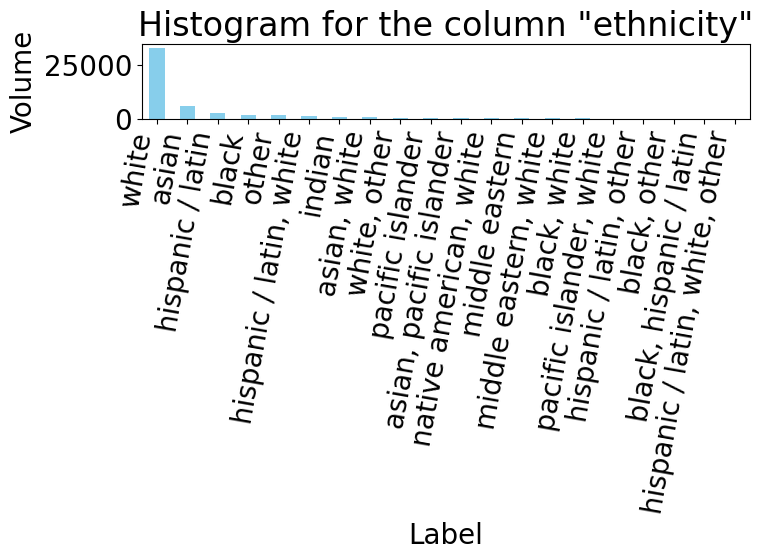

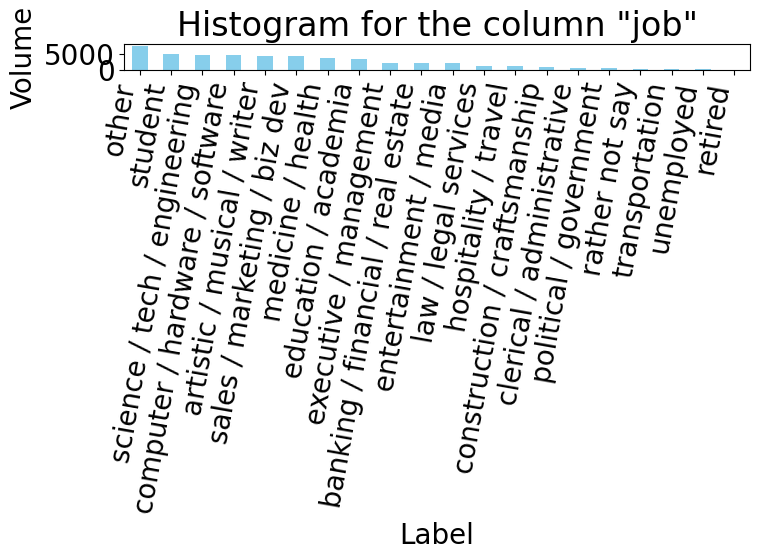

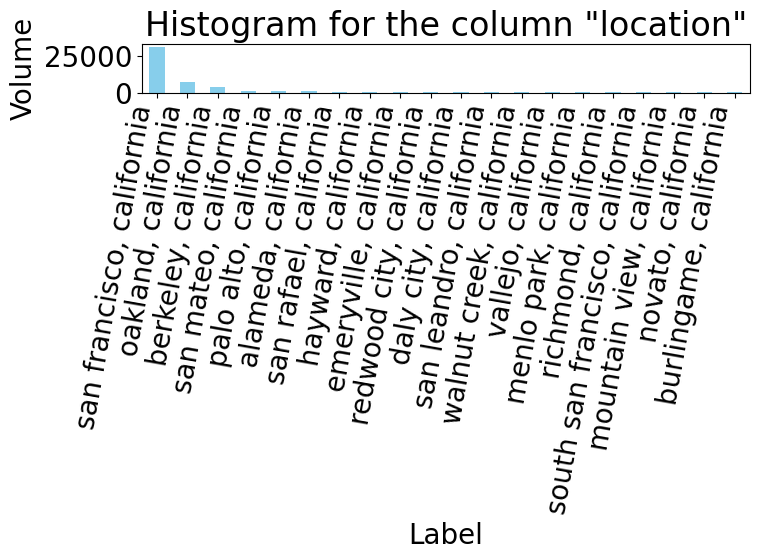

<ipython-input-191-215ed558f815>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


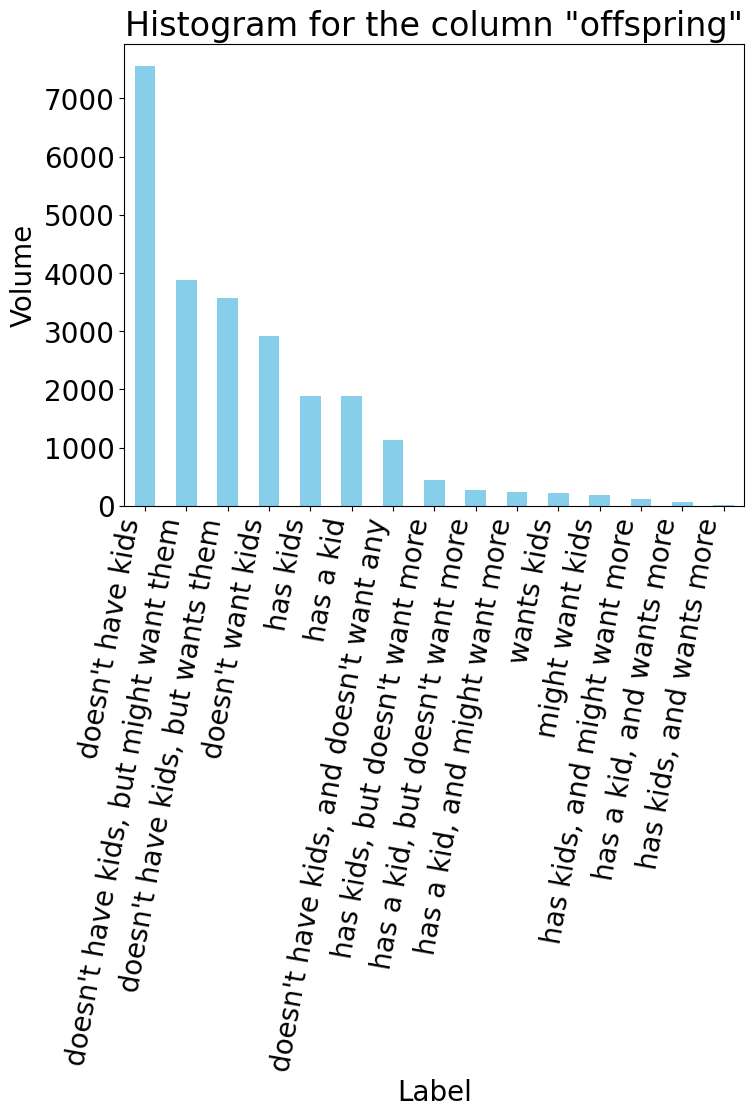

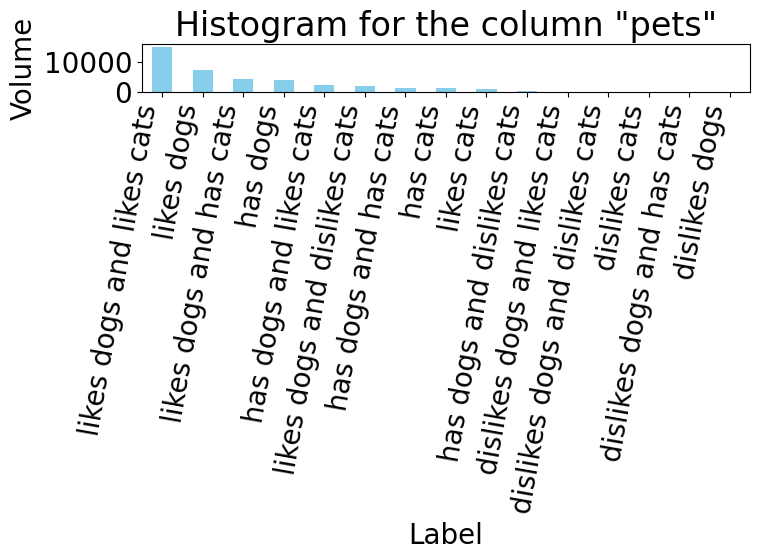

<ipython-input-191-215ed558f815>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


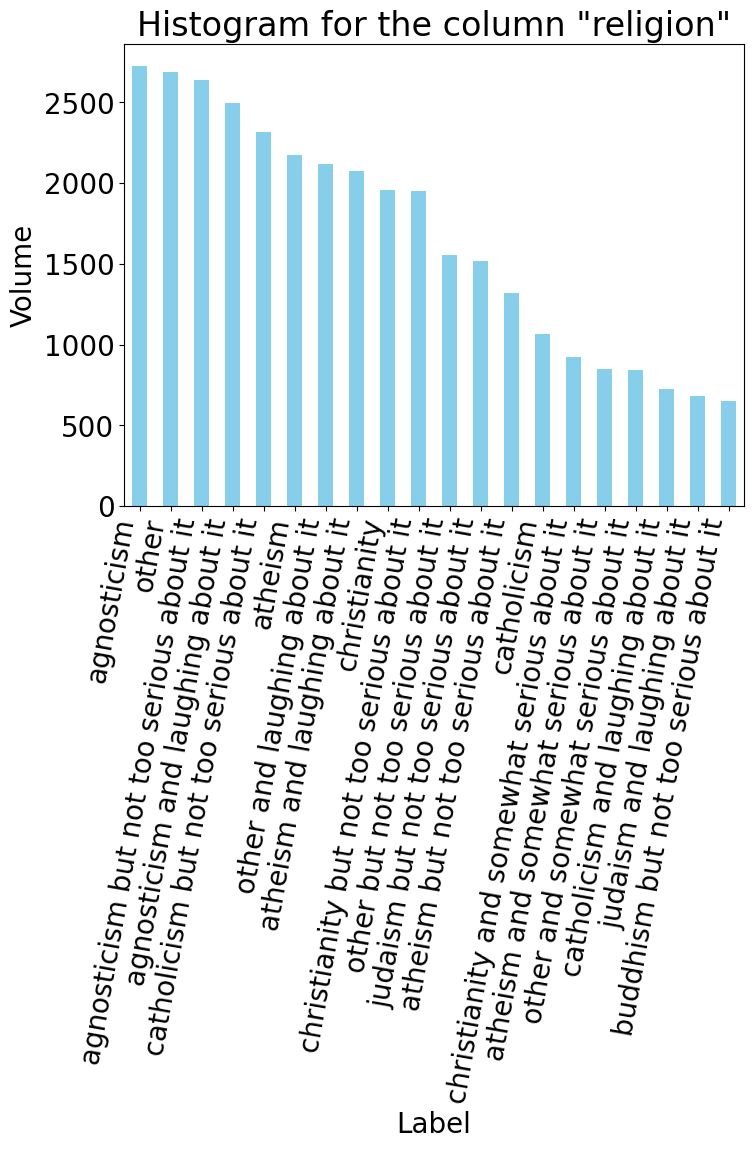

<ipython-input-191-215ed558f815>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


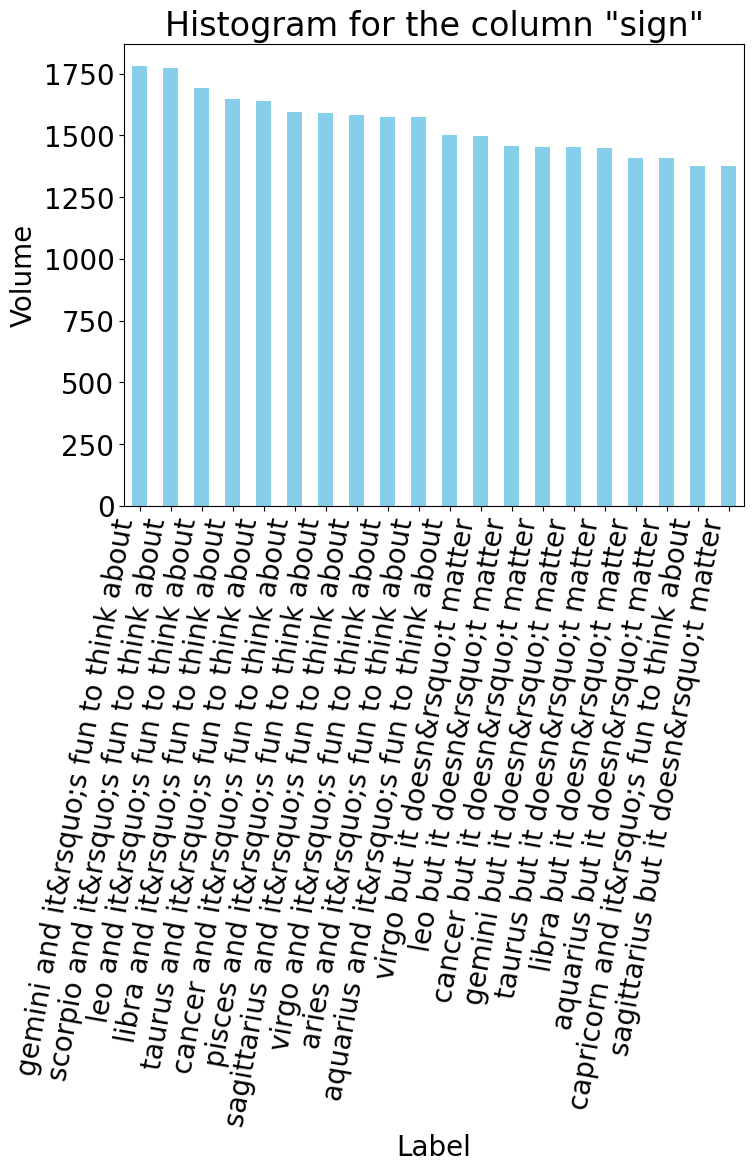

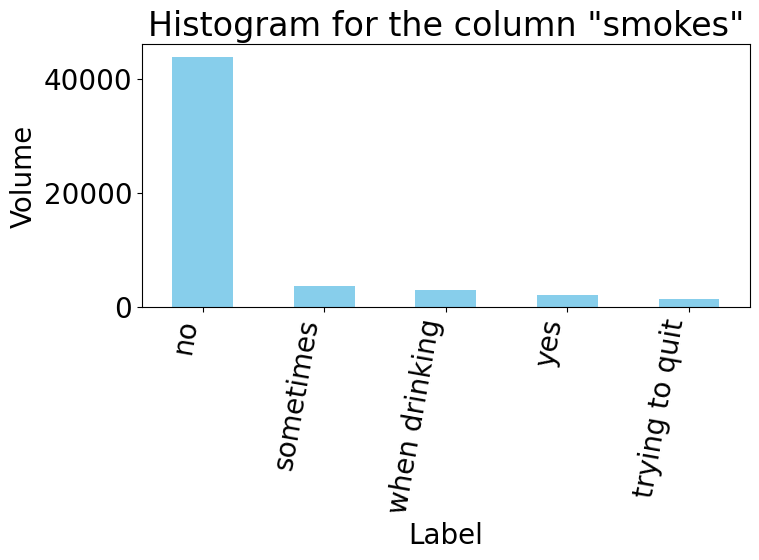

<ipython-input-191-215ed558f815>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


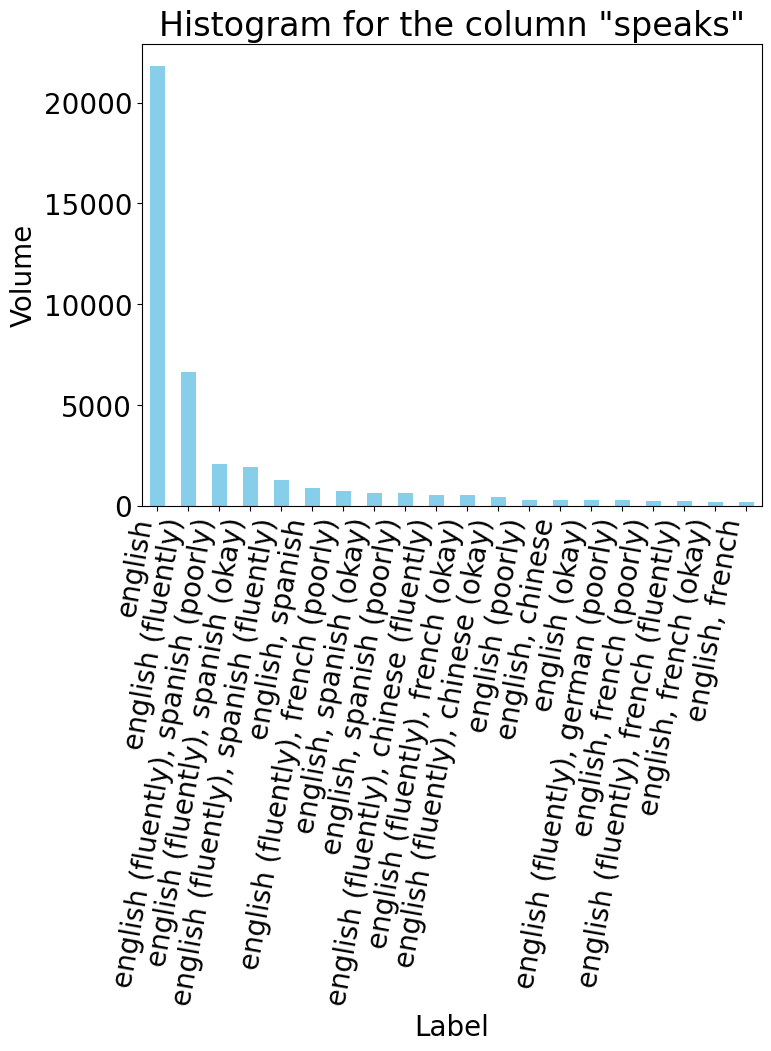

In [191]:
#Histogramy dla danych nienumerycznych
#Wybierz kolumny typu 'object', które zawierają "essay" w nazwie
essay_columns = [col for col in okcupid_original.columns if 'essay' in col]

#Wybierz tylko kolumny, które nie zawierają "essay" w nazwie oraz pomijamy kolumnę '[last_online]'
object_columns = okcupid_original.select_dtypes(include=['object']).drop(columns=essay_columns + ['last_online'], errors='ignore')

#Tworzymy histogramy dla każdej z wybranych kolumn
#W przypadku, jeżeli mamy więcej niż 50 etykiet w danej kolumnie - pozostawiamy na wykresie tylko 20 najpopularniejszych
for column in object_columns.columns:
    plt.figure(figsize=(8, 6))
    if len(object_columns[column].unique()) <= 20:
        value_counts = object_columns[column].value_counts()
    else:
        value_counts = object_columns[column].value_counts()[:20]

    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Histogram for the column "{column}"')
    plt.xlabel('Label')
    plt.ylabel('Volume')
    plt.xticks(rotation=80, ha='right')  # Obrót etykiet osi X
    plt.tight_layout()  # Dostosowanie układu
    plt.show()

In [192]:
#Statystki zbioru przed modyfikacjami
#Przegląd statystyk na kolumnach numerycznych
okcupid_original.describe()

age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000

In [193]:
#Przegląd statystyk na kolumnach nienumerycznych
okcupid_original.describe(exclude=np.number)

status    sex orientation body_type             diet    drinks  drugs  \
count    59946  59946       59946     54650            35551     56961  45866   
unique       5      2           3        12               18         6      3   
top     single      m    straight   average  mostly anything  socially  never   
freq     55697  35829       51606     14652            16585     41780  37724   

                                education ethnicity    job       last_online  \
count                               53318     54266  51748             59946   
unique                                 32       217     21             30123   
top     graduated from college/university     white  other  2012-06-29-22-56   
freq                                23959     32831   7589                24   

                         location          offspring  \
count                       59946              24385   
unique                        199                 15   
top     san francisco, california  doesn't have kids   
freq                        31064               7560   

                             pets     religion  \
count                       40025        39720   
unique                         15           45   
top     likes dogs and likes cats  agnosticism   
freq                        14814         2724   

                                            sign smokes   speaks essay0  \
count                                      48890  54434    59896  54458   
unique                                        48      5     7647  54347   
top     gemini and it&rsquo;s fun to think about     no  english      .   
freq                                        1782  43896    21828     12   

              essay1     essay2    essay3  essay4  essay5     essay6  \
count          52374      50308     48470   49409   49096      46175   
unique         51516      48625     43520   49257   48961      43583   
top     enjoying it.  listening  my smile  ask me  family  my future   
freq              61         82       529      16       6        161   

                  essay7  essay8        essay9  
count              47495   40721         47343  
unique             45548   39323         45440  
top     out with friends  ask me  you want to.  
freq                  89      45           200

In [194]:
#3.3 Przegląd poszczególnych kolumn

In [195]:
#Pomocnicze rozszerzenie wyświetlanej ilości kolumn
pd.set_option('display.max_columns', 31)

In [196]:
#Pomocnicze sprawdzenie, jakich wartości możemy się spodziewać w zbiorze
okcupid_original.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  height  income                          job  \
0         asian, white    75.0      -1               transportation   
1                white    70.0   80000         hospitality / travel   
2                  NaN    68.0      -1                          NaN   
3                white    71.0   20000                      student   
4  asian, black, other    66.0      -1  artistic / musical / writer   

        last_online                         location  \
0  2012-06-28-20-30  south san francisco, california   
1  2012-06-29-21-41              oakland, california   
2  2012-06-27-09-10        san francisco, california   
3  2012-06-28-14-22             berkeley, california   
4  2012-06-27-21-26        san francisco, california   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                                     NaN                   has cats   
3                       doesn't want kids                 likes cats   
4                                     NaN  likes dogs and likes cats   

                                   religion  \
0     agnosticism and very serious about it   
1  agnosticism but not too serious about it   
2                                       NaN   
3                                       NaN   
4                                       NaN   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks  \
0                                            english   
1  english (fluently), spanish (poorly), french (...   
2                               english, french, c++   
3                           english, german (poorly)   
4                                            english   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  \
0  the

In [197]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
#Zostawienie ich tylko jako podgląd wartości, nie wyświetlanie wszystkich
pd.set_option('display.max_rows', 4)

In [198]:
#[age]
print(okcupid_original["age"].value_counts())
print("Dtype:", okcupid_original["age"].dtype)
print("Unique Values:", okcupid_original["age"].nunique())
print("Range:", okcupid_original["age"].min(), "-", okcupid_original["age"].max())

age
26     3724
27     3685
       ... 
110       1
109       1
Name: count, Length: 54, dtype: int64
Dtype: int64
Unique Values: 54
Range: 18 - 110


In [199]:
#[status]
print(okcupid_original["status"].value_counts())
print("Dtype:", okcupid_original["status"].dtype)
print("Unique Values:", okcupid_original["status"].nunique())

status
single            55697
seeing someone     2064
                  ...  
married             310
unknown              10
Name: count, Length: 5, dtype: int64
Dtype: object
Unique Values: 5


In [200]:
#[sex]
print(okcupid_original["sex"].value_counts())
print("Dtype:", okcupid_original["sex"].dtype)
print("Unique Values:", okcupid_original["sex"].nunique())

sex
m    35829
f    24117
Name: count, dtype: int64
Dtype: object
Unique Values: 2


In [201]:
#[orientation]
print(okcupid_original["orientation"].value_counts())
print("Dtype:", okcupid_original["orientation"].dtype)
print("Unique Values:", okcupid_original["orientation"].nunique())

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64
Dtype: object
Unique Values: 3


In [202]:
#[body_type]
print(okcupid_original["body_type"].value_counts())
print("Dtype:", okcupid_original["body_type"].dtype)
print("Unique Values:", okcupid_original["body_type"].nunique())

body_type
average           14652
fit               12711
                  ...  
used up             355
rather not say      198
Name: count, Length: 12, dtype: int64
Dtype: object
Unique Values: 12


In [203]:
#[diet]
print(okcupid_original["diet"].value_counts())
print("Dtype:", okcupid_original["diet"].dtype)
print("Unique Values:", okcupid_original["diet"].nunique())

diet
mostly anything    16585
anything            6183
                   ...  
halal                 11
kosher                11
Name: count, Length: 18, dtype: int64
Dtype: object
Unique Values: 18


In [204]:
#[drinks]
print(okcupid_original["drinks"].value_counts())
print("Dtype:", okcupid_original["drinks"].dtype)
print("Unique Values:", okcupid_original["drinks"].nunique())

drinks
socially       41780
rarely          5957
               ...  
very often       471
desperately      322
Name: count, Length: 6, dtype: int64
Dtype: object
Unique Values: 6


In [205]:
#[drugs]
print(okcupid_original["drugs"].value_counts())
print("Dtype:", okcupid_original["drugs"].dtype)
print("Unique Values:", okcupid_original["drugs"].nunique())

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64
Dtype: object
Unique Values: 3


In [206]:
#[education]
print(okcupid_original["education"].value_counts())
print("Dtype:", okcupid_original["education"].dtype)
print("Unique Values:", okcupid_original["education"].nunique())

education
graduated from college/university    23959
graduated from masters program        8961
                                     ...  
dropped out of med school               12
med school                              11
Name: count, Length: 32, dtype: int64
Dtype: object
Unique Values: 32


In [207]:
#[ethnicity]
print(okcupid_original["ethnicity"].value_counts())
print("Dtype:", okcupid_original["ethnicity"].dtype)
print("Unique Values:", okcupid_original["ethnicity"].nunique())

ethnicity
white                                                                 32831
asian                                                                  6134
                                                                      ...  
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64
Dtype: object
Unique Values: 217


In [208]:
#[height]
print(okcupid_original["height"].value_counts())
print("Dtype:", okcupid_original["height"].dtype)
print("Unique Values:", okcupid_original["height"].nunique())
print("Range:", okcupid_original["height"].min(), "-", okcupid_original["height"].max())

height
70.0    6074
68.0    5449
        ... 
52.0       1
4.0        1
Name: count, Length: 60, dtype: int64
Dtype: float64
Unique Values: 60
Range: 1.0 - 95.0


In [209]:
#[income]
print(okcupid_original["income"].value_counts())
print("Dtype:", okcupid_original["income"].dtype)
print("Unique Values:", okcupid_original["income"].nunique())
print("Range:", okcupid_original["income"].min(), "-", okcupid_original["income"].max())

income
-1         48442
 20000      2952
           ...  
 250000      149
 500000       48
Name: count, Length: 13, dtype: int64
Dtype: int64
Unique Values: 13
Range: -1 - 1000000


In [210]:
#[job]
print(okcupid_original["job"].value_counts())
print("Dtype:", okcupid_original["job"].dtype)
print("Unique Values:", okcupid_original["job"].nunique())

job
other       7589
student     4882
            ... 
retired      250
military     204
Name: count, Length: 21, dtype: int64
Dtype: object
Unique Values: 21


In [211]:
#[last_online]
print(okcupid_original["last_online"].value_counts())
print("Dtype:", okcupid_original["last_online"].dtype)
print("Unique Values:", okcupid_original["last_online"].nunique())
print("Range:", okcupid_original["last_online"].min(), "-", okcupid_original["last_online"].max())

last_online
2012-06-29-22-56    24
2012-06-30-21-51    23
                    ..
2012-05-31-19-01     1
2012-06-14-16-51     1
Name: count, Length: 30123, dtype: int64
Dtype: object
Unique Values: 30123
Range: 2011-06-27-01-52 - 2012-07-01-08-57


In [212]:
#[location]
print(okcupid_original["location"].value_counts())
print("Dtype:", okcupid_original["location"].dtype)
print("Unique Values:", okcupid_original["location"].nunique())

location
san francisco, california    31064
oakland, california           7214
                             ...  
london, united kingdom           1
rochester, michigan              1
Name: count, Length: 199, dtype: int64
Dtype: object
Unique Values: 199


In [213]:
#[offspring]
print(okcupid_original["offspring"].value_counts())
print("Dtype:", okcupid_original["offspring"].dtype)
print("Unique Values:", okcupid_original["offspring"].nunique())

offspring
doesn't have kids                         7560
doesn't have kids, but might want them    3875
                                          ... 
has a kid, and wants more                   71
has kids, and wants more                    21
Name: count, Length: 15, dtype: int64
Dtype: object
Unique Values: 15


In [214]:
#[pets]
print(okcupid_original["pets"].value_counts())
print("Dtype:", okcupid_original["pets"].dtype)
print("Unique Values:", okcupid_original["pets"].nunique())

pets
likes dogs and likes cats     14814
likes dogs                     7224
                              ...  
dislikes dogs and has cats       81
dislikes dogs                    44
Name: count, Length: 15, dtype: int64
Dtype: object
Unique Values: 15


In [215]:
#[religion]
print(okcupid_original["religion"].value_counts())
print("Dtype:", okcupid_original["religion"].dtype)
print("Unique Values:", okcupid_original["religion"].nunique())

religion
agnosticism                           2724
other                                 2691
                                      ... 
hinduism and very serious about it      14
islam and very serious about it         13
Name: count, Length: 45, dtype: int64
Dtype: object
Unique Values: 45


In [216]:
#[sign]
print(okcupid_original["sign"].value_counts())
print("Dtype:", okcupid_original["sign"].dtype)
print("Unique Values:", okcupid_original["sign"].nunique())

sign
gemini and it&rsquo;s fun to think about     1782
scorpio and it&rsquo;s fun to think about    1772
                                             ... 
capricorn and it matters a lot                 45
virgo and it matters a lot                     41
Name: count, Length: 48, dtype: int64
Dtype: object
Unique Values: 48


In [217]:
#[smokes]
print(okcupid_original["smokes"].value_counts())
print("Dtype:", okcupid_original["smokes"].dtype)
print("Unique Values:", okcupid_original["smokes"].nunique())

smokes
no                43896
sometimes          3787
                  ...  
yes                2231
trying to quit     1480
Name: count, Length: 5, dtype: int64
Dtype: object
Unique Values: 5


In [218]:
#[speaks]
print(okcupid_original["speaks"].value_counts())
print("Dtype:", okcupid_original["speaks"].dtype)
print("Unique Values:", okcupid_original["speaks"].nunique())

speaks
english                                                             21828
english (fluently)                                                   6628
                                                                    ...  
english (fluently), french (okay), italian (okay), hebrew (okay)        1
english (fluently), french, farsi                                       1
Name: count, Length: 7647, dtype: int64
Dtype: object
Unique Values: 7647


In [219]:
#[essay0]
#print(okcupid_original["essay0"].value_counts())
print("Dtype:", okcupid_original["essay0"].dtype)
print("Unique Values:", okcupid_original["essay0"].nunique())

Dtype: object
Unique Values: 54347


In [220]:
#[essay1]
#print(okcupid_original["essay1"].value_counts())
print("Dtype:", okcupid_original["essay1"].dtype)
print("Unique Values:", okcupid_original["essay1"].nunique())

Dtype: object
Unique Values: 51516


In [221]:
#[essay2]
#print(okcupid_original["essay2"].value_counts())
print("Dtype:", okcupid_original["essay2"].dtype)
print("Unique Values:", okcupid_original["essay2"].nunique())

Dtype: object
Unique Values: 48625


In [222]:
#[essay3]
#print(okcupid_original["essay3"].value_counts())
print("Dtype:", okcupid_original["essay3"].dtype)
print("Unique Values:", okcupid_original["essay3"].nunique())

Dtype: object
Unique Values: 43520


In [223]:
#[essay4]
#print(okcupid_original["essay4"].value_counts())
print("Dtype:", okcupid_original["essay4"].dtype)
print("Unique Values:", okcupid_original["essay4"].nunique())

Dtype: object
Unique Values: 49257


In [224]:
#[essay5]
#print(okcupid_original["essay5"].value_counts())
print("Dtype:", okcupid_original["essay5"].dtype)
print("Unique Values:", okcupid_original["essay5"].nunique())

Dtype: object
Unique Values: 48961


In [225]:
#[essay6]
#print(okcupid_original["essay6"].value_counts())
print("Dtype:", okcupid_original["essay6"].dtype)
print("Unique Values:", okcupid_original["essay6"].nunique())

Dtype: object
Unique Values: 43583


In [226]:
#[essay7]
#print(okcupid_original["essay7"].value_counts())
print("Dtype:", okcupid_original["essay7"].dtype)
print("Unique Values:", okcupid_original["essay7"].nunique())

Dtype: object
Unique Values: 45548


In [227]:
#[essay8]
#print(okcupid_original["essay8"].value_counts())
print("Dtype:", okcupid_original["essay8"].dtype)
print("Unique Values:", okcupid_original["essay8"].nunique())

Dtype: object
Unique Values: 39323


In [228]:
#[essay9]
#print(okcupid_original["essay9"].value_counts())
print("Dtype:", okcupid_original["essay9"].dtype)
print("Unique Values:", okcupid_original["essay9"].nunique())

Dtype: object
Unique Values: 45440


In [229]:
#4. Przekształcenia i analiza danych

In [230]:
#Kopiowanie zbioru danych przed rozpoczęciem operacji na nich
okcupid = okcupid_original.copy()

In [231]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
#Przywrócenie do pierwotnego stanu
pd.set_option('display.max_rows', None)

In [232]:
#4.1 Usunięcia

In [233]:
#4.1.1 Usunięcia kolumn

In [234]:
#Lista kolumn do usunięcia
columns_to_drop = ['ethnicity', 'height', 'income', 'last_online', 'location', 'sign', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

In [235]:
#Usunięcie kolumn
okcupid.drop(columns=columns_to_drop, inplace=True)

In [236]:
#Sprawdzenie usunięcia
info_df = print_dataframe_info(okcupid)

    Column Name  Non-Null   Dtype  Uni. Val.
0           age     59946   int64         54
1        status     59946  object          5
2           sex     59946  object          2
3   orientation     59946  object          3
4     body_type     54650  object         12
5          diet     35551  object         18
6        drinks     56961  object          6
7         drugs     45866  object          3
8     education     53318  object         32
9           job     51748  object         21
10    offspring     24385  object         15
11         pets     40025  object         15
12     religion     39720  object         45
13       smokes     54434  object          5
Number of rows:  59946
Number of columns:  14


In [237]:
#4.1.2 Usunięcia wierszy z niepożądanymi wartościami

In [238]:
#Słownik z wierszami do usunięcia, gdzie kluczami są nazwy kolumn, a wartości to listy wartości do usunięcia
rows_to_drop = {'status': ['married', 'unknown'], 'orientation': ['bisexual', 'gay']}

In [239]:
#Usunięcie wierszy (nadpisanie zbioru)
for column, values in rows_to_drop.items():
    okcupid = okcupid[~okcupid[column].isin(values)]

In [240]:
#Sprawdzenie poprawności wykonania operacji - status
print(okcupid["status"].value_counts())
print("Dtype:", okcupid["status"].dtype)
print("Unique Values:", okcupid["status"].nunique())

status
single            48710
seeing someone     1490
available          1172
Name: count, dtype: int64
Dtype: object
Unique Values: 3


In [241]:
#Sprawdzenie poprawności wykonania operacji - orientation
print(okcupid["orientation"].value_counts())
print("Dtype:", okcupid["orientation"].dtype)
print("Unique Values:", okcupid["orientation"].nunique())

orientation
straight    51372
Name: count, dtype: int64
Dtype: object
Unique Values: 1


In [242]:
#4.2 Wartości odstające

In [243]:
#Lista kolumn do badania wartości odstających
columns_check_outliers = ['age']

In [244]:
#Definicja funkcji do zobrazowania wartości odstających na wykresie
def plot_outliers(dataframe, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        plt.plot(dataframe[column], marker='o', linestyle='None', color='blue', markersize=3)
        plt.title(f'Value of column"{column}"')
        plt.xlabel('Index')
        plt.ylabel(f'Value {column}')
        plt.grid(True)
        plt.show()

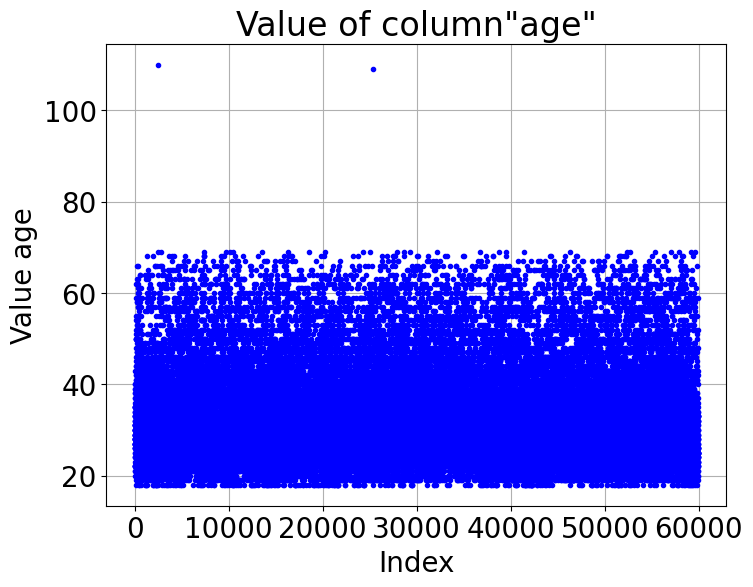

In [245]:
#Wyświetlenie wykresu
plot_outliers(okcupid, columns_check_outliers)

In [246]:
#Wyświetlenie wierszy, w których wartość kolumny "age" przekracza 100
print(okcupid[okcupid['age'] > 100])

       age     status sex orientation body_type          diet drinks  drugs  \
2512   110     single   f    straight       NaN           NaN    NaN    NaN   
25324  109  available   m    straight  athletic  mostly other    NaN  never   

                        education      job        offspring pets  \
2512                          NaN      NaN              NaN  NaN   
25324  working on masters program  student  might want kids  NaN   

                                  religion         smokes  
2512                                   NaN            NaN  
25324  other and somewhat serious about it  when drinking  


In [247]:
#Usunięcie wierszy (nadpisanie zbioru), w których wartość kolumny "age" przekracza 100
okcupid = okcupid[okcupid['age'] <= 100]

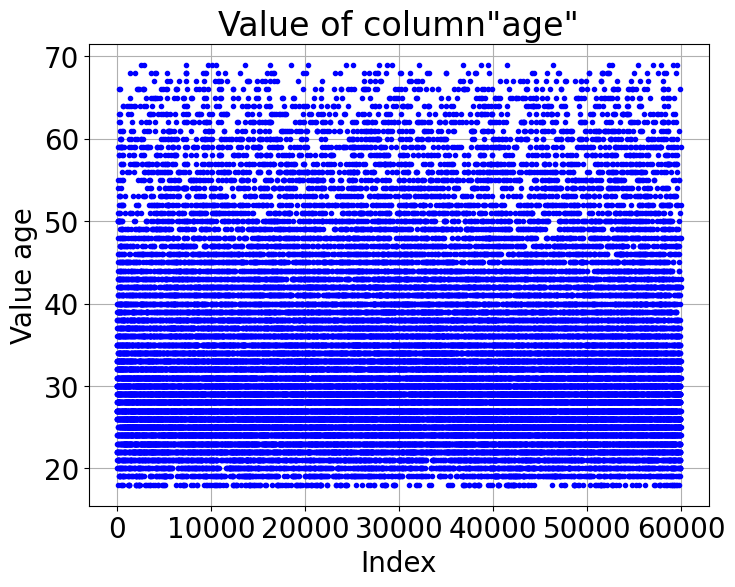

In [248]:
#Wyświetlenie wykresu
plot_outliers(okcupid, columns_check_outliers)

In [249]:
#4.3 Wartości NaN

In [250]:
#Definiowanie customowej funkcji do wyświetlania informacji o wartościach NaN
def print_nan_count_info(dataframe):
    nan_count_series = dataframe.isna().sum()
    info_df = pd.DataFrame({
        "Column Name": nan_count_series.index,
        "Dtype": dataframe.dtypes,
        "NaN Count": nan_count_series.values
    })

    info_df = print(info_df.reset_index(drop=True))

    nan_count = dataframe.isna().sum().sum()

    nan_info = print("Number of NaN values in the dataset:", nan_count)

    return info_df, nan_info

In [251]:
#Sprawdzanie ilości NaN w poszczególnych kolumnach oraz całościowo zbiorze
info_nan_df = print_nan_count_info(okcupid)

    Column Name   Dtype  NaN Count
0           age   int64          0
1        status  object          0
2           sex  object          0
3   orientation  object          0
4     body_type  object       4386
5          diet  object      20427
6        drinks  object       2591
7         drugs  object      12018
8     education  object       5613
9           job  object       6916
10    offspring  object      29866
11         pets  object      17471
12     religion  object      17526
13       smokes  object       4803
Number of NaN values in the dataset: 121617


In [252]:
#Lista kolumn do uzupełnienia wartości NaN
columns_to_replace_nan = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring', 'pets', 'religion', 'smokes']

In [253]:
#Definiowanie customowej funkcji do uzupełniania wartości NaN za pomocą strategii most_frequent
def replace_nan_with_most_frequent(dataframe, columns):
    #Inicjalizacja klasy SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    #Dopasowanie imputera do danych i ich transformacja
    imputed_data = imputer.fit_transform(dataframe[columns])
    dataframe[columns] = imputed_data

    for column in columns:
        most_frequent_value = imputer.statistics_[columns.index(column)]
        print(f"The most frequent value in the column '{column}': {most_frequent_value}")

    return dataframe

In [254]:
#Uzupełnienie kolumn z wartościami NaN
okcupid = replace_nan_with_most_frequent(okcupid, columns_to_replace_nan)

The most frequent value in the column 'body_type': average
The most frequent value in the column 'diet': mostly anything
The most frequent value in the column 'drinks': socially
The most frequent value in the column 'drugs': never
The most frequent value in the column 'education': graduated from college/university
The most frequent value in the column 'job': other
The most frequent value in the column 'offspring': doesn't have kids
The most frequent value in the column 'pets': likes dogs and likes cats
The most frequent value in the column 'religion': agnosticism
The most frequent value in the column 'smokes': no


In [255]:
#Sprawdzanie ilości NaN w poszczególnych kolumnach oraz całościowo zbiorze po przekształceniach
info_nan_df = print("Number of NaN values in the dataset:", okcupid.isna().sum().sum())

Number of NaN values in the dataset: 0


In [256]:
#4.4 Kodowania

In [257]:
#Checkpoint - kopiowanie danych przed rozpoczęciem operacji kodowań
okcupid1 = okcupid.copy()

In [258]:
#4.4.1 One-hot encoding

In [259]:
#Lista kolumn do One-hot encoding
columns_to_one_hot = ['sex', 'orientation','status', 'education', 'job']

In [260]:
#Uzupełnienie kolumn za pomocą One-hot encoding
for column in columns_to_one_hot:
    okcupid1 = pd.get_dummies(okcupid1, columns=[column])

In [261]:
#Sprawdzenie zmian na zbiorze
print(okcupid1.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   True   
1  agnosticism but not too

In [262]:
#4.4.2 One-hot encoding po rozdzieleniu treści

In [263]:
#Ze względu na złożoność przypadków każdy z nich zostanie rozpatrzony indywidualnie.

In [264]:
#[diet]
#Dokładne sprawdzenie wartości
print(okcupid_original["diet"].value_counts())

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64


In [265]:
#Typy diet dostępne w zbiorze
diet_types = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']

#Przetwarzanie diety na 2 odrębne cechy
def process_diet(diet):
    is_serious_about_diet = True if 'strictly' in diet else False #Sprawdzenie występowania "strictly" w diecie
    diet_type = None
    for word in diet.split():
        if word in diet_types:
            diet_type = word
            break

    return is_serious_about_diet, diet_type

In [266]:
#Zastosowanie funkcji
okcupid1['is_serious_about_diet'], okcupid1['diet_type'] = zip(*okcupid1['diet'].apply(process_diet))

In [267]:
#Wyświetlenie wyników rozdzielenia kolumny
print("After splitting the [diet] column")
print(okcupid1.head())

After splitting the [diet] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   

In [268]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['diet_type'])

In [269]:
#Wyświetlenie wyników po przekodowaniu kolumny
print("After One-hot encoding the [diet] column")
print(okcupid1.head())

After One-hot encoding the [diet] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  F

In [270]:
#[offspring]
#Dokładne sprawdzenie wartości
print(okcupid_original["offspring"].value_counts())

offspring
doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: count, dtype: int64


In [271]:
#Przetwarzanie potomstwa na 2 odrębne cechy
def process_offspring(offspring):
    want_kids = False if "doesn't want" in offspring else True  #Sprawdzenie występowania 3 kombinacji "doesn't want": kids, more, any
    has_kids = True if 'has kids' in offspring or 'has a kid' in offspring else False  #Sprawdzenie występowania 'has kids' lub 'has a kid'

    return has_kids, want_kids

In [272]:
#Zastosowanie funkcji
okcupid1['want_kids'], okcupid1['has_kids'] = zip(*okcupid1['offspring'].apply(process_offspring))

In [273]:
#Wyświetlenie kolumny po rozdzieleniu treści i jednoczesnym przekodowaniu one-hot
print("After splitting the [offspring] column")
print(okcupid1.head())

After splitting the [offspring] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  Fal

In [274]:
#[pets]
#Dokładne sprawdzenie wartości
print(okcupid1["pets"].value_counts())

pets
likes dogs and likes cats          30032
likes dogs                          6405
has dogs                            3590
likes dogs and has cats             3459
has dogs and likes cats             1943
likes dogs and dislikes cats        1735
has dogs and has cats               1188
has cats                            1115
likes cats                           892
has dogs and dislikes cats           468
dislikes dogs and likes cats         182
dislikes dogs and dislikes cats      164
dislikes cats                        108
dislikes dogs and has cats            54
dislikes dogs                         35
Name: count, dtype: int64


In [275]:
#Przetwarzanie zwierząt na 4 odrębne cechy
def process_pets(pets):
    has_dogs = True if 'has dogs' in pets else False
    has_cats = True if 'has cats' in pets else False
    likes_dogs = False if "dislikes dogs" in pets else True
    likes_cats = False if "dislikes cats" in pets else True

    return likes_dogs, likes_cats, has_dogs, has_cats

In [276]:
#Zastosowanie fukncji
okcupid1['likes_dogs'], okcupid1['likes_cats'], okcupid1['has_dogs'], okcupid1['has_cats'] = zip(*okcupid1['pets'].apply(process_pets))

In [277]:
#Wyświetlenie kolumny po rozdzieleniu treści i jednoczesnym przekodowaniu one-hot
print("After splitting the [pets] column")
print(okcupid1.head())

After splitting the [pets] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   

In [278]:
#[religion]
#Dokładne sprawdzenie wartości
print(okcupid_original["religion"].value_counts())

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

In [279]:
#Typy religii dostępne w zbiorze
religion_types = ['agnosticism', 'other', 'agnosticism', 'catholicism', 'atheism', 'christianity', 'judaism', 'buddhism', 'hinduism', 'islam']

#Przetwarzanie religii na 2 odrębne cechy
def process_religion(religion):
    is_serious_about_religion = True if 'somewhat serious about it' in religion or 'very serious about it' in religion else False
    religion_type = None
    for word in religion.split():
        if word in religion_types:
            religion_type = word
            break

    return is_serious_about_religion, religion_type

In [280]:
#Zastosowanie funkcji
okcupid1['is_serious_about_religion'], okcupid1['religion_type'] = zip(*okcupid1['religion'].apply(process_religion))

In [281]:
#Wyświetlenie wyników rozdzielenia kolumny
print("After splitting the [religion] column")
print(okcupid1.head())

After splitting the [religion] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  Fals

In [282]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['religion_type'])

In [283]:
#Wyświetlenie wyników po przekodowaniu kolumny one-hot
print("After One-hot encoding the [religion] column")
print(okcupid1.head())

After One-hot encoding the [religion] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometime

In [284]:
#[body_type]
#Dokładne sprawdzenie wartości
print(okcupid_original["body_type"].value_counts())

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


In [285]:
#Typy sylwetek dostępne w zbiorze, podzielone na wstępne kategorie
body_type_categories = {
    "athletic": ["athletic", "fit", "average"],
    "slim": ["thin", "skinny"],
    "curvy": ["a little extra", "curvy", "full figured"],
    "overweight": ["overweight", "jacked", "used up", "rather not say"]
}

In [286]:
#Przetwarzanie typu sylwetki na 4 odrębne cechy
def process_body_type(body_type):
    body_type_processed = None
    for category, synonyms in body_type_categories.items():
        if body_type in synonyms:
            body_type_processed = category
            break

    return body_type_processed

In [287]:
#Zastosowanie funkcji
okcupid1['body_type_processed'] =  okcupid1['body_type'].apply(process_body_type)

In [288]:
#Wyświetlenie wyników zmiany kolumny
print("After changing the [body_type] column")
print(okcupid1.head())

After changing the [body_type] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  Fals

In [289]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['body_type_processed'])

In [290]:
#Wyświetlenie wyników po przekodowaniu kolumny one-hot
print("After One-hot encoding the [body_type_processed] column")
print(okcupid1.head())

After One-hot encoding the [body_type_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about i

In [291]:
#[drinks]
#Dokładne sprawdzenie wartości
print(okcupid_original["drinks"].value_counts())

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64


In [292]:
#Stosunki do alkoholu dostępne w zbiorze, podzielone na wstępne kategorie
drinks_categories = {
    "not at all": ["not at all"],
    "sometimes": ["socially", "rarely"],
    "often": ["often", "very often", "desperately"]
}

In [293]:
#Przetwarzanie stosunków do alkoholu na 3 odrębne cechy
def process_drinks(drinks):
    drinks_processed = None
    for category, synonyms in drinks_categories.items():
        if drinks in synonyms:
            drinks_processed = category
            break

    return drinks_processed

In [294]:
#Zastosowanie funkcji
okcupid1['drinks_processed'] =  okcupid1['drinks'].apply(process_drinks)

In [295]:
#Wyświetlenie wyników zmiany kolumny
print("After changing the [drinks] column")
print(okcupid1.head())

After changing the [drinks] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False  

In [296]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['drinks_processed'])

In [297]:
#Wyświetlenie wyników po przekodowaniu kolumny one-hot
print("After One-hot encoding the [drinks_processed] column")
print(okcupid1.head())

After One-hot encoding the [drinks_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  

In [298]:
#[drugs]
#Dokładne sprawdzenie wartości
print(okcupid_original["drugs"].value_counts())

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64


In [299]:
#Stosunki do narkotyków dostępne w zbiorze, podzielone na wstępne kategorie
drugs_categories = {
    "never": ["never"],
    "sometimes": ["sometimes"],
    "often": ["often"]
}

In [300]:
#Przetwarzanie typu sylwetki na 4 odrębne cechy
def process_drugs(drugs):
    drugs_processed = None
    for category, synonyms in drugs_categories.items():
        if drugs in synonyms:
            drugs_processed = category
            break

    return drugs_processed

In [301]:
#Zastosowanie funkcji
okcupid1['drugs_processed'] =  okcupid1['drugs'].apply(process_drugs)

In [302]:
#Wyświetlenie wyników zmiany kolumny
print("After changing the [drugs] column")
print(okcupid1.head())

After changing the [drugs] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   

In [303]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['drugs_processed'])

In [304]:
#Wyświetlenie wyników po przekodowaniu kolumny one-hot
print("After One-hot encoding the [drugs_processed] column")
print(okcupid1.head())

After One-hot encoding the [drugs_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  s

In [305]:
#[smokes]
#Dokładne sprawdzenie wartości
print(okcupid_original["smokes"].value_counts())

smokes
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64


In [306]:
#Stosunki do palenia dostępne w zbiorze, podzielone na wstępne kategorie
smokes_categories = {
            "no": ["no"],
            "sometimes": ["sometimes", "when drinking", "trying to quit"],
            "yes": ["yes"]
}

In [307]:
#Przetwarzanie typu sylwetki na 4 odrębne cechy
def process_smokes(smokes):
    smokes_processed = None
    for category, synonyms in smokes_categories.items():
        if smokes in synonyms:
            smokes_processed = category
            break

    return smokes_processed

In [308]:
#Zastosowanie funkcji
okcupid1['smokes_processed'] =  okcupid1['smokes'].apply(process_smokes)

In [309]:
#Wyświetlenie wyników zmiany kolumny
print("After changing the [smokes] column")
print(okcupid1.head())

After changing the [smokes] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False  

In [310]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['smokes_processed'])

In [311]:
#Wyświetlenie wyników po przekodowaniu kolumny one-hot
print("After One-hot encoding the [smokes_processed] column")
print(okcupid1.head())

After One-hot encoding the [smokes_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  

In [312]:
#4.5 Statystyki opisowe / Histogramy

In [313]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji kodowań
okcupid3 = okcupid1.copy()

In [314]:
#Deduplikacja kolumn

In [315]:
#Na zakończenie sprawdzamy, które kolumny się powtarzają
info_df = print_dataframe_info(okcupid3)

                                     Column Name  Non-Null   Dtype  Uni. Val.
0                                            age     51370   int64         52
1                                      body_type     51370  object         12
2                                           diet     51370  object         18
3                                         drinks     51370  object          6
4                                          drugs     51370  object          3
5                                      offspring     51370  object         15
6                                           pets     51370  object         15
7                                       religion     51370  object         45
8                                         smokes     51370  object          5
9                                          sex_f     51370    bool          2
10                                         sex_m     51370    bool          2
11                          orientation_straight     51370    bo

In [316]:
#Usuwanie nadmiarowych kolumn - lista do usunięcia
columns_to_drop = ['body_type', 'diet', 'drinks', 'drugs', 'offspring', 'pets', 'religion', 'smokes']

In [317]:
#Usunięcie kolumn
okcupid3.drop(columns=columns_to_drop, inplace=True)

In [318]:
#Zbiór po oczyszceniu z nadmiarowych kolumn
info_df = print_dataframe_info(okcupid3)

                                    Column Name  Non-Null  Dtype  Uni. Val.
0                                           age     51370  int64         52
1                                         sex_f     51370   bool          2
2                                         sex_m     51370   bool          2
3                          orientation_straight     51370   bool          1
4                              status_available     51370   bool          2
5                         status_seeing someone     51370   bool          2
6                                 status_single     51370   bool          2
7                  education_college/university     51370   bool          2
8   education_dropped out of college/university     51370   bool          2
9          education_dropped out of high school     51370   bool          2
10          education_dropped out of law school     51370   bool          2
11     education_dropped out of masters program     51370   bool          2
12          

In [319]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji
okcupid4 = okcupid3.copy()

In [320]:
#Przedląd statystyk na kolumnch numerycznych
okcupid4.describe()

age
count  51370.000000
mean      32.489332
std        9.475387
min       18.000000
25%       26.000000
50%       30.000000
75%       37.000000
max       69.000000

In [321]:
#Przedląd statystyk na kolumnch nienumerycznych (w pracy inżynierskiej są jedynie przedstawione opisowo wnioski)
describe_non_numeric = okcupid4.describe(exclude=np.number)
true_percentage = (okcupid4 == True).mean() * 100
describe_non_numeric.loc['true_percentage'] = true_percentage
print(describe_non_numeric)

                    sex_f     sex_m orientation_straight status_available  \
count               51370     51370                51370            51370   
unique                  2         2                    1                2   
top                 False      True                 True            False   
freq                30915     30915                51370            50199   
true_percentage  39.81896  60.18104                100.0         2.279541   

                status_seeing someone status_single  \
count                           51370         51370   
unique                              2             2   
top                             False          True   
freq                            49880         48709   
true_percentage              2.900526     94.819934   

                education_college/university  \
count                                  51370   
unique                                     2   
top                                    False   
freq          

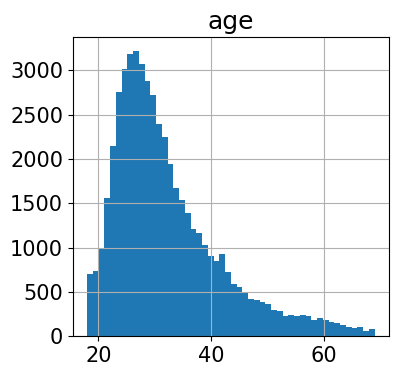

In [322]:
#Histogramy dla kolumn numerycznych
%matplotlib inline
plt.rcParams.update({'font.size': 15})

# Określenie liczby kolumn i wierszy dla histogramów
n_rows = (len(okcupid4.columns) + 3) // 4  # Zaokrąglenie w górę
n_cols = 4

# Wyświetlanie histogramów
okcupid4.hist(bins=50, figsize=(20, 5 * n_rows), layout=(n_rows, n_cols))
plt.show()

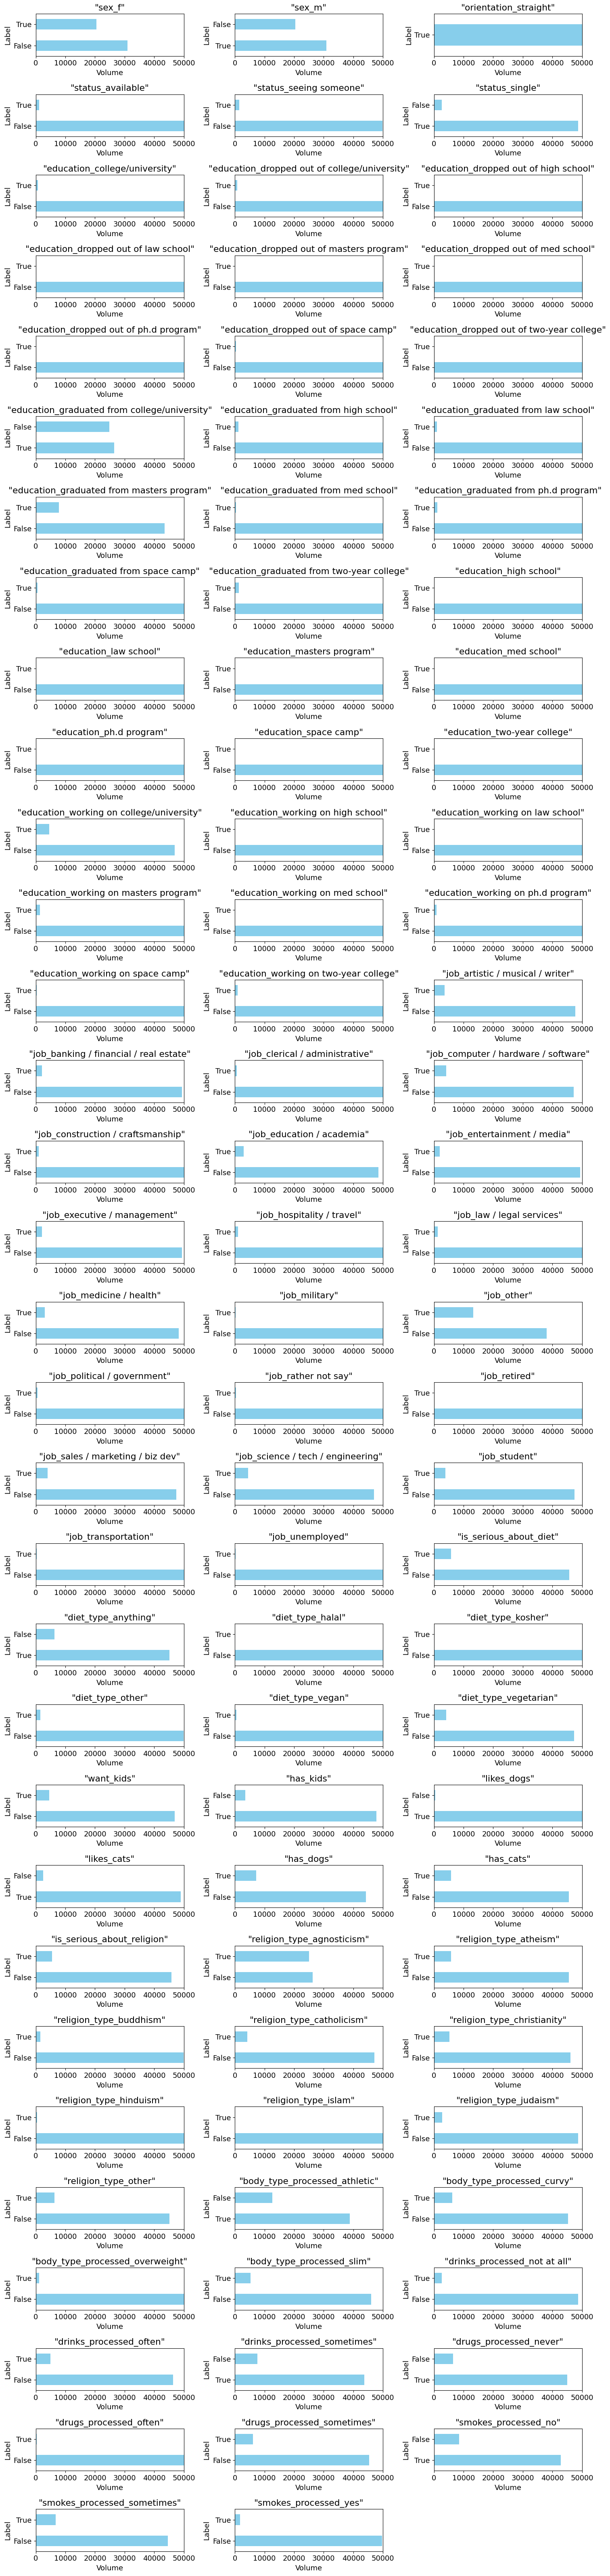

In [323]:
#Histogramy dla kolumn nienumerycznych

# Kolumny typu bool
object_columns = okcupid4.select_dtypes(include=['bool'])

plt.rcParams.update({'font.size': 13})

# Określenie liczby wierszy i kolumn dla wykresów
n_rows = len(object_columns.columns) // 3 + (len(object_columns.columns) % 3 > 0)  # Zaokrąglenie w górę

# Tworzymy wykresy słupkowe dla każdej z wybranych kolumn
fig, axs = plt.subplots(n_rows, 3, figsize=(15, 2 * n_rows))  # Zmniejszenie wysokości osi Y o połowę
axs = axs.flatten()  # Spłaszczanie osi wykresów do jednego wymiaru

for i, column in enumerate(object_columns.columns):
    if len(object_columns[column].unique()) <= 50:
        value_counts = object_columns[column].value_counts()
    else:
        value_counts = object_columns[column].value_counts()[:50]

    ax = axs[i]  # Wybieranie odpowiedniej osi wykresu
    value_counts.plot(kind='barh', color='skyblue', ax=ax, width=0.5)  # Zmniejszenie szerokości słupków o połowę
    ax.set_title(f'"{column}"')
    ax.set_xlabel('Volume')
    ax.set_ylabel('Label')
    ax.set_xlim(0, 50000)  # Ograniczenie osi X do 50000

    # Ustalanie etykiet osi Y w zależności od występowania wartości True i False
    if 'False' in value_counts.index and 'True' in value_counts.index:
        ax.set_yticklabels(['False', 'True'], fontsize=10)
    elif 'False' in value_counts.index:
        ax.set_yticklabels(['False'], fontsize=10)
    elif 'True' in value_counts.index:
        ax.set_yticklabels(['True'], fontsize=10)

    # Usuwanie nieużywanych osi wykresów
    if i >= len(object_columns.columns) - 1:
        for j in range(i + 1, n_rows * 3):
            axs[j].remove()

plt.tight_layout()  # Dostosowanie układu
plt.show()


In [324]:
#5. Budowa modeli

In [325]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji
okcupid5 = okcupid4.copy()

In [326]:
#5.1 Redukowanie wymiarowości

In [327]:
#Część teoretyczna z rego rozdziału zostaje pominięta w kodzie

In [328]:
#5.1.8 Analiza głównych składowych (PCA)

In [329]:
#Kod budowany wg. schematu w książce "Python i praca z danymi, rodział 11"

In [330]:
#Przeprowadzenie PCA
data = np.array(okcupid5)

In [331]:
# Sprawdzenie typu danych i kształtu tablicy data
print(type(data))
print(data.shape)

# Upewnienie się, że dane są typu float
data = data.astype(float)

<class 'numpy.ndarray'>
(51370, 96)


In [332]:
#Sprawdzenie jak wyglądają dane po operacji astype
print(type(data))

<class 'numpy.ndarray'>


In [333]:
#Macierz kowariancji
#Wyśrodkowanie danych
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)

In [334]:
#Obliczanie wartości własnych i wektora macierzy kowariancji
evals, evecs = la.eig(cov)

In [335]:
#Mnoży macierz pierwotnych danych przez macierz wektora własnego

#Sortuje wartości własne i wektory własne, po czym wybiera składowe
num_components=2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]

In [336]:
print("Wartości własne:", evals)

Wartości własne: [89.8315281 +0.j  0.52651733+0.j]


In [337]:
print("Wektory własne:", evecs)

Wektory własne: [[ 9.99729135e-01 -6.61979260e-03]
 [ 3.63346467e-03  6.53079030e-01]
 [-3.63346467e-03 -6.53079030e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.37377553e-04 -1.16677903e-02]
 [-8.60497368e-04  2.99595417e-03]
 [ 3.23119815e-04  8.67183611e-03]
 [ 1.82782089e-04 -1.78349927e-03]
 [ 4.05984492e-04 -9.08798444e-03]
 [-2.64130718e-05 -6.18483849e-04]
 [ 1.30334203e-05 -7.63662208e-05]
 [ 1.14679138e-04 -4.12695999e-04]
 [ 1.39922849e-05 -7.49428633e-05]
 [ 1.02593262e-04 -9.49084473e-04]
 [-6.08857351e-05 -4.39311818e-03]
 [ 6.43398070e-05 -1.44516935e-03]
 [-3.62830449e-05 -3.04020146e-02]
 [-5.05113159e-04 -4.89269187e-03]
 [ 8.56478936e-04  3.61174991e-03]
 [ 6.56749353e-03  3.90577031e-02]
 [ 2.28913441e-04  2.54438030e-03]
 [ 1.44111831e-03 -6.41492858e-03]
 [ 1.59607853e-04 -3.75878680e-03]
 [ 1.01613888e-03 -2.66020594e-03]
 [-4.60999181e-05 -7.11595039e-04]
 [ 2.36594777e-05 -3.23850554e-05]
 [ 1.16101035e-04  2.16532077e-04]
 [ 3.16261446e-06 -5.35425374e-05]
 [ 3

In [338]:
#Mnoży pierwotne dane przez wektory własne
principal_components=np.dot(data,evecs)
print("Głowne składowe:", principal_components)

Głowne składowe: [[-10.5088841   -0.20654705]
 [  2.49639352  -0.74972091]
 [  5.51042485  -0.18769746]
 ...
 [ -8.5091144   -0.72453023]
 [  9.51708853  -0.63636073]
 [ -5.51177491  -0.66577111]]


In [339]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
pd.set_option('display.max_rows', 10)

In [340]:
#Analiza głównych składowych przy użyciu biblioteki scikit-learn
data=np.array(okcupid5)

#Tworzy i dopasowuje model PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data = components,
                             columns = ['główna_składowa_1', 'główna_składowa_2'])
print(components_df)

       główna_składowa_1  główna_składowa_2
0             -10.508884          -0.206587
1               2.496394          -0.749732
2               5.510425          -0.187659
3              -9.501751          -0.103458
4              -3.492555          -0.623290
...                  ...                ...
51365          -1.489048           0.768129
51366          26.523822           0.615161
51367          -8.509114          -0.724546
51368           9.517089          -0.636360
51369          -5.511775          -0.665784

[51370 rows x 2 columns]


In [341]:
#5.2 Wyznaczanie liczby skupień

In [342]:
#5.2.2 Metoda Łokcia

In [343]:
#Sprawdzenie czy ramka
print(okcupid5.shape)

(51370, 96)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

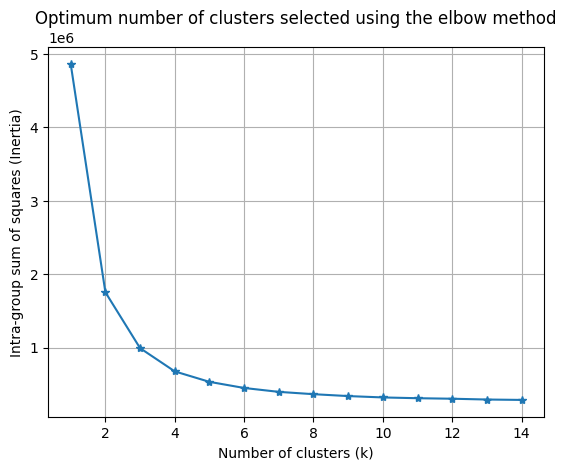

In [344]:
#Metoda Łokcia
data = okcupid5
wcss_list = []

for i in range (1, 15):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    #Dodanie wskaźnika WCSS (bezwładność) skupień do score_list
    wcss_list.append(kmeans_model.inertia_)

plt.rcParams.update({'font.size': 10})

#Bezwładność
plt.plot(range(1, 15), wcss_list, marker='*')

#Tytuły wykresu
plt.title('Optimum number of clusters selected using the elbow method')

#Wyznacza etykietę osi x
plt.xlabel('Number of clusters (k)')

#Wyznacza etykietę osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

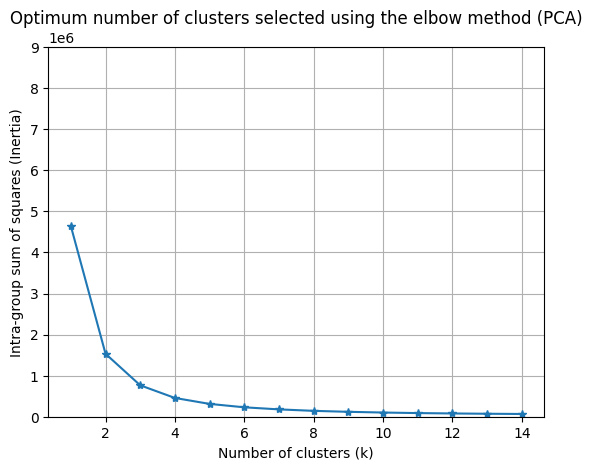

In [345]:
#Metoda Łokcia z PCA
data = components_df  # Składowe PCA

wcss_list = []

for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # Dodanie WCSS do listy
    wcss_list.append(kmeans_model.inertia_)

# Wykres WCSS
plt.plot(range(1, 15), wcss_list, marker='*')

# Tytuł wykresu
plt.title('Optimum number of clusters selected using the elbow method (PCA)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Ustawienie zakresu osi y
plt.ylim(0, 9e6)

# Etykieta osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

# Dodanie siatki
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

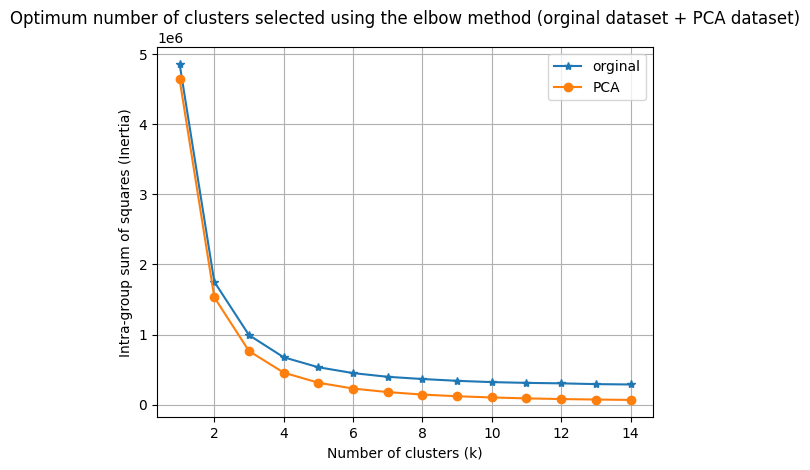

In [346]:
#Nałożenie na siebie obu wykresów Metody Łokcia

# Dane pierwotne
data_original = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data_original)

# Metoda łokcia dla danych pierwotnych
wcss_list_original = []
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data_original)
    wcss_list_original.append(kmeans_model.inertia_)

# Metoda łokcia dla danych po PCA
wcss_list_pca = []
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(components)
    wcss_list_pca.append(kmeans_model.inertia_)

# Wykres metody łokcia dla danych pierwotnych
plt.plot(range(1, 15), wcss_list_original, marker='*', label='orginal')

# Wykres metody łokcia dla danych po PCA
plt.plot(range(1, 15), wcss_list_pca, marker='o', label='PCA')

# Tytuł wykresu
plt.title('Optimum number of clusters selected using the elbow method (orginal dataset + PCA dataset)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Etykieta osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

# Legenda
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.show()

In [347]:
#5.2.3 Metoda Profili

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

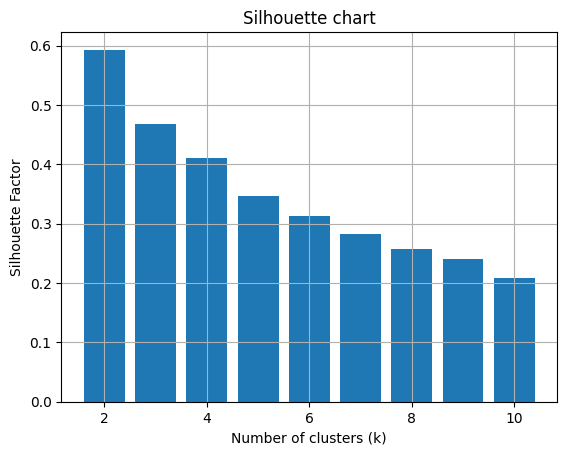

In [348]:
#Uwaga na ten kod - długo się wykonuje!
#Metoda Profili

data = okcupid5
score_list = []

for i in range (2, 11):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    #Uzyskuje przewidywania
    pred=kmeans_model.predict(data)
    #Obliczanie wskaźnika profilu
    score = silhouette_score(data, pred, metric='euclidean')

    #Dodaje wskaźnik profilu skupień do score_list
    score_list.append(score)

#Wykres współczynnika profilu w funkcji liczby skupień
plt.bar(range(2, 11), score_list)

#Wyznacza tytuł wykresu
plt.title('Silhouette chart')

#Wyznacza etykietę osi x
plt.xlabel('Number of clusters (k)')

#Wyznacza etykietę osi y
plt.ylabel('Silhouette Factor')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

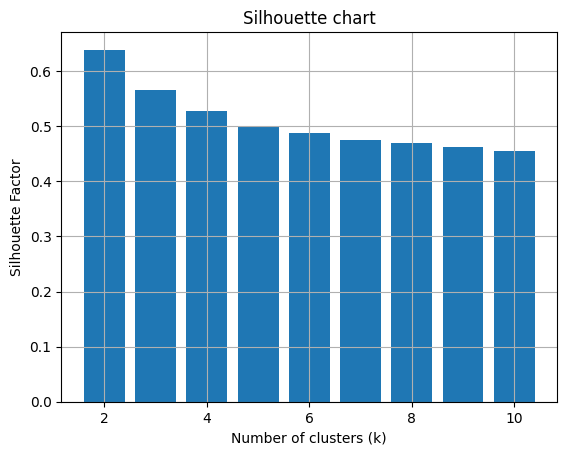

In [349]:
#Uwaga na ten kod - długo się wykonuje!
#Metoda profilu po PCA

# Import wskaźnika profilu
from sklearn.metrics import silhouette_score

data = components_df  # Składowe PCA
score_list = []

for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # Uzyskanie przewidywań
    pred = kmeans_model.predict(data)
    # Obliczenie wskaźnika profilu
    score = silhouette_score(data, pred, metric='euclidean')

    # Dodanie wskaźnika profilu skupień do score_list
    score_list.append(score)

# Wykres współczynnika profilu w funkcji liczby skupień
plt.bar(range(2, 11), score_list)

# Wyznaczenie tytułu wykresu
plt.title('Silhouette chart')

# Wyznaczenie etykiety osi x
plt.xlabel('Number of clusters (k)')

# Wyznaczenie etykiety osi y
plt.ylabel('Silhouette Factor')

# Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

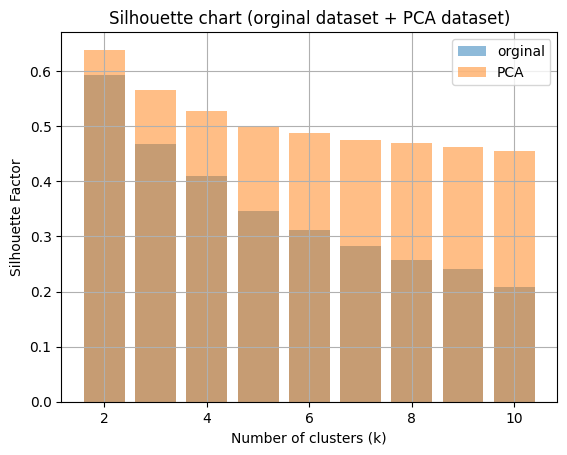

In [350]:
#Uwaga na ten kod - długo się wykonuje!
#Nałożenie na siebie obu wykresów Profilu

# Dane pierwotne
data_original = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data_original)

# Metoda Profilu dla danych pierwotnych
score_list_original = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data_original)
    pred = kmeans_model.predict(data_original)
    score = silhouette_score(data_original, pred, metric='euclidean')
    score_list_original.append(score)

# Metoda Profilu dla danych po PCA
score_list_pca = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(components)
    pred = kmeans_model.predict(components)
    score = silhouette_score(components, pred, metric='euclidean')
    score_list_pca.append(score)

# Wykres metody Profilu dla danych pierwotnych
plt.bar(range(2, 11), score_list_original, alpha=0.5, label='orginal')

# Wykres metody Profilu dla danych po PCA
plt.bar(range(2, 11), score_list_pca, alpha=0.5, label='PCA')

# Tytuł wykresu
plt.title('Silhouette chart (orginal dataset + PCA dataset)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Etykieta osi y
plt.ylabel('Silhouette Factor')

# Legenda
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.show()

In [351]:
#5.3 Metoda k-średnich (k-means)/centroidów

In [352]:
#Metoda k-średnich (k-means)/centroidów (bez PCA)
data = okcupid5

#Definiowanie liczby skupień
num_clusters = 2

#Tworzy i dopasowuje model KMeans
km = KMeans(n_clusters=num_clusters)
km.fit(data)

#Przewiduje zmienną docelową
pred=km.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 1 ... 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


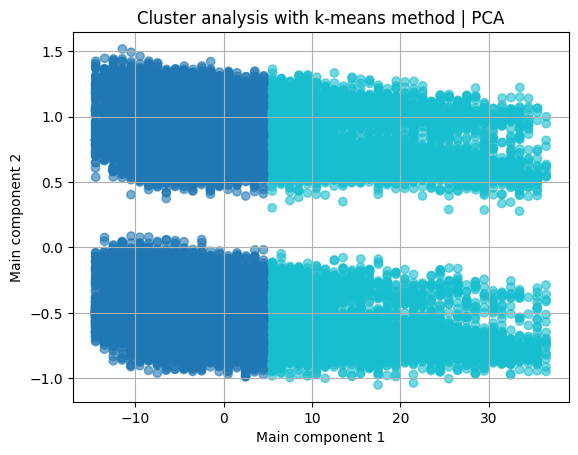

In [353]:
#Metoda k-średnich (k-means)/centroidów z użyciem PCA

# Definiowanie liczby skupień
num_clusters = 2

# Tworzy i dopasowuje model KMeans
km = KMeans(n_clusters=num_clusters) #unikanie losowości, random_state=42 - nie jest konieczne?
km.fit(components)

# Przewiduje zmienną docelową
pred_km = km.predict(components)

# Tworzy wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_km, marker="o", cmap="tab10", alpha=0.6)
plt.title('Cluster analysis with k-means method | PCA')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [354]:
#5.3 Hierarchiczna analiza skupień

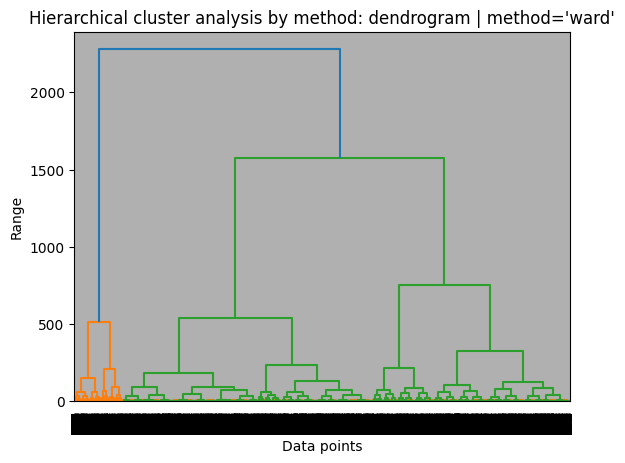

In [355]:
#Uwaga, wykonuje się ponad 15 minut!
#Hierarchiczna analiza skupień

data=components_df

# Dodanie kolorów klastrów
color_threshold = 2.5  # Próg kolorowania klastrów
for i, color in zip(range(1, num_clusters + 1), plt.cm.tab10.colors):
    plt.axhline(y=color_threshold * i, color=color, linestyle='--')

#Tworzy dendrogram za pomocą wiązania Warda
dendrogram_plot = dendrogram(linkage(data, method='ward'))

#Wyznacza tytuł wykresu
plt.title("Hierarchical cluster analysis by method: dendrogram | method='ward'")

#Wyznacza etykietę osi x
plt.xlabel('Data points')

#Wyznacza etykietę osi y
plt.ylabel('Range')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

In [356]:
#Aglomeracyjna analiza skupień

data=okcupid5

#Wyznacza liczbę skupień
num_clusters=2

#Model aglomeracyjny analizy skupień
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

#Dopasowuje model aglomeracyjnej analizy skupień
ac.fit(data)

#Przewidywanie zmiennej docelowej
pred=ac.fit_predict(data)

print(pred)

[0 0 0 ... 0 1 0]


Initial data rows:
   główna_składowa_1  główna_składowa_2
0         -10.508884          -0.206587
1           2.496394          -0.749732
2           5.510425          -0.187659
3          -9.501751          -0.103458
4          -3.492555          -0.623290

Column data types:
główna_składowa_1    float64
główna_składowa_2    float64
dtype: object

Missing values:
główna_składowa_1    0
główna_składowa_2    0
dtype: int64

DataFrame indexes:
RangeIndex(start=0, stop=51370, step=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


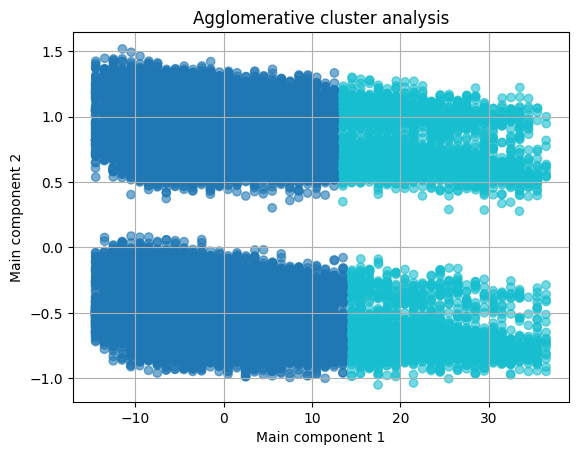

In [357]:
#Aglomeracyjna analiza skupień z PCA

# Wczytanie danych z PCA (components_df)
data = components_df

# 1. Wyświetlenie początkowych wierszy danych
print("Initial data rows:")
print(data.head())

# 2. Sprawdzenie typów danych kolumn
print("\nColumn data types:")
print(data.dtypes)

# 3. Sprawdzenie brakujących wartości
print("\nMissing values:")
print(data.isnull().sum())

# 4. Sprawdzenie indeksów DataFrame
print("\nDataFrame indexes:")
print(data.index)

# Wyznaczenie liczby skupień
num_clusters = 2

# Wybór losowych punktów startowych
random_indices = np.random.choice(len(data), num_clusters, replace=False)
random_centers = data.values[random_indices]

# Model aglomeracyjny analizy skupień z losowym inicjowaniem
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean',
                             compute_full_tree='auto', connectivity=None, distance_threshold=None)

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Agglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()


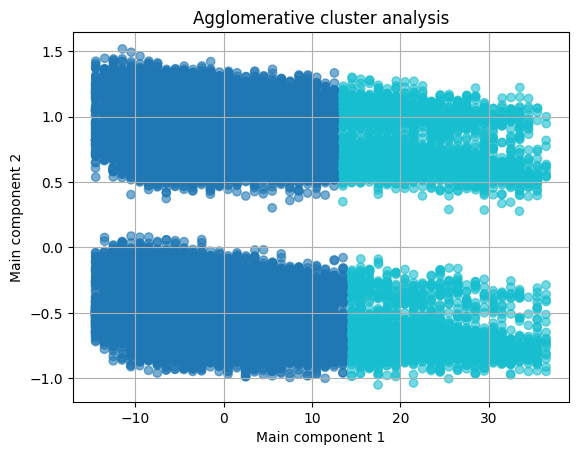

In [358]:
#Agglomeracyjna analiza skupień

# Wczytanie danych z PCA (components_df)
data = components_df

# Wyznaczenie liczby skupień
num_clusters = 2

# Model aglomeracyjny analizy skupień
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Agglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [359]:
#Deglomeracyjna analiza skupień

data = okcupid5

# Wyznaczenie liczby skupień
num_clusters = 2

# Model deglomeracyjny analizy skupień
ac_deg = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu deglomeracyjnej analizy skupień
ac_deg.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac_deg.fit_predict(data)

print(pred)

[1 1 1 ... 1 0 1]


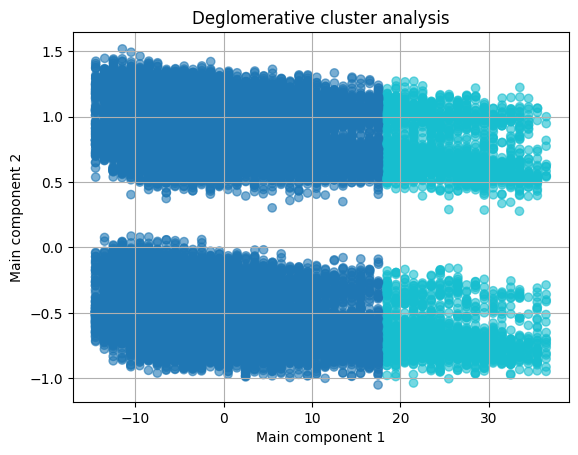

In [360]:
#Deglomeracyjna analiza skupień po PCA

# Wczytanie danych z PCA (components_df)
data = components_df

# Wyznaczenie liczby skupień
num_clusters = 2

# Model aglomeracyjny analizy skupień
ac_deg = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac_deg.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac_deg.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Deglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [361]:
#5.5 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

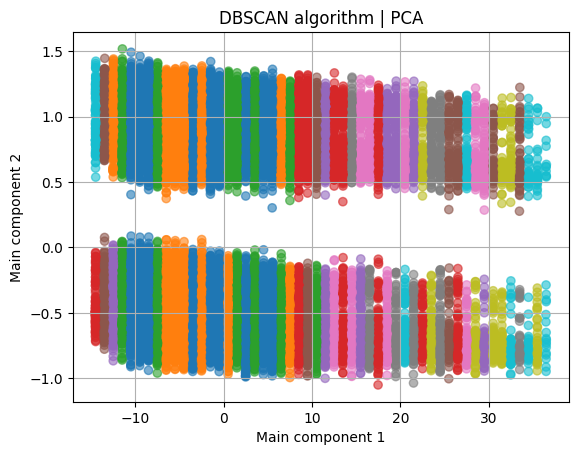

In [362]:
#DBSCAN PCA bez rozdziału klastrów
data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(components)

pred_label = db.fit_predict(components)

# Wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)
plt.title("DBSCAN algorithm | PCA")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

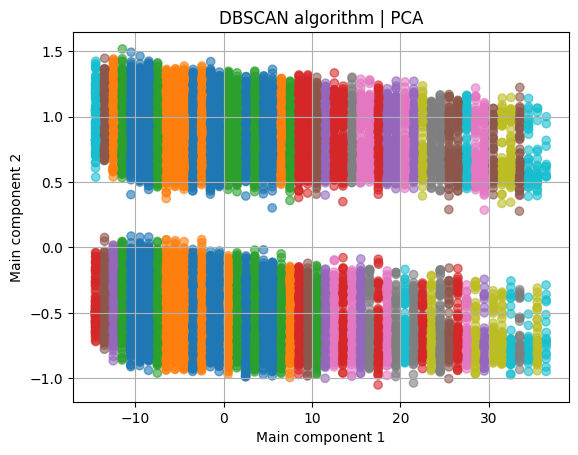

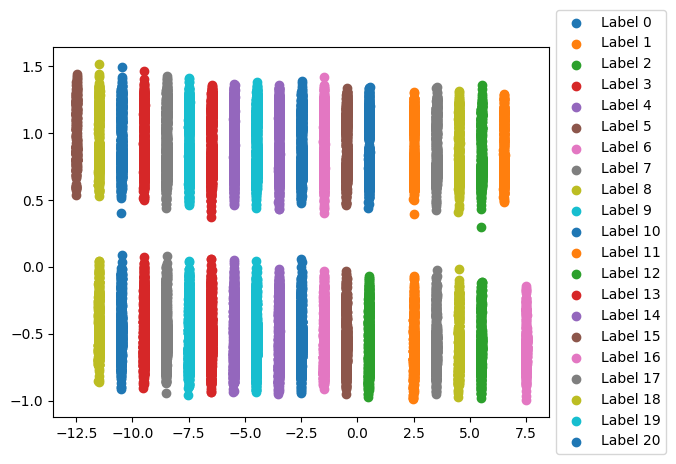

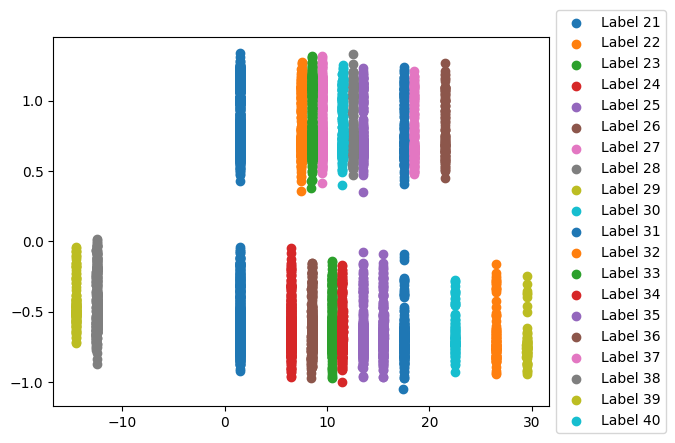

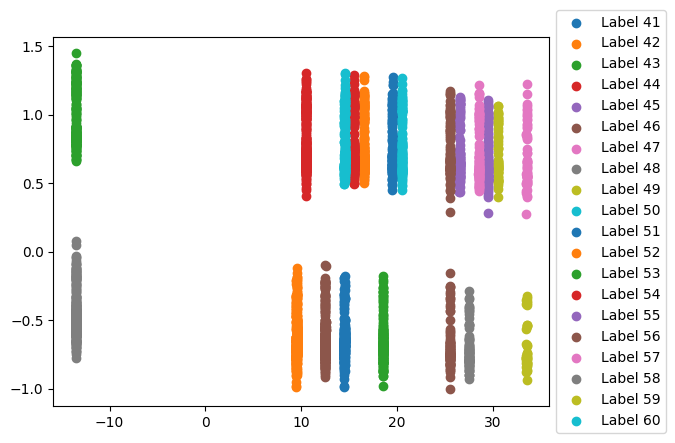

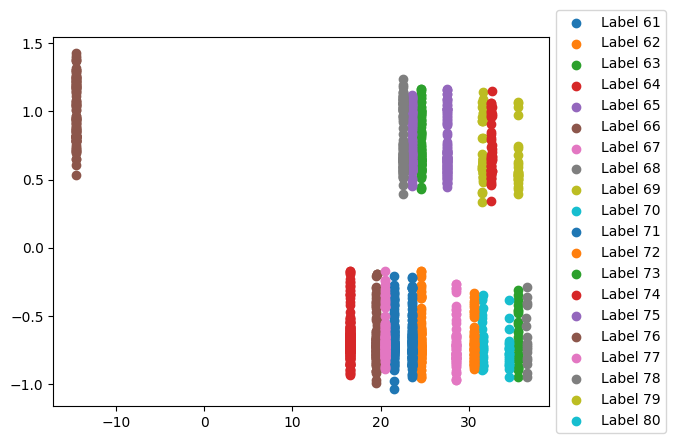

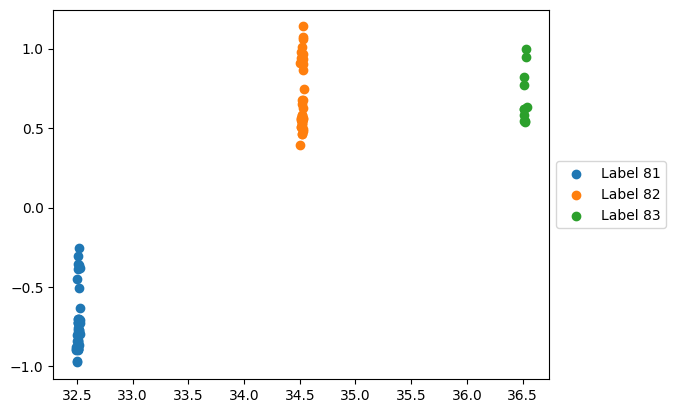

In [363]:
#DBSCAN PCA z rozdziałem klastrów
data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(components)

pred_label = db.fit_predict(components)

# Wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)
plt.title("DBSCAN algorithm | PCA")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)

# Zapisujemy etykiety
labels = np.unique(pred_label)

# Tworzymy osobny rysunek dla etykiet
fig, ax = plt.subplots()

# Umieszczamy etykiety na wykresie
for i, label in enumerate(labels):
    if label != -1:
        indices = pred_label == label
        x = components[indices, 0]
        y = components[indices, 1]
        ax.scatter(x, y, label=f'Label {label}')
    elif i == 0:
        indices = pred_label == label
        x = components[indices, 0]
        y = components[indices, 1]
        ax.scatter(x, y, label=f'Noise')

    # Zawijanie listy co 20 etykiet
    if i % 20 == 0 and i != 0:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        fig, ax = plt.subplots()

# Dodajemy legendę na końcu
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [387]:
#5.6 Porównanie modeli i wnioski

In [388]:
#5.6.1 Wstęp - część teoretyczna pominięta

In [389]:
#Ocenianie jakości analizy skupień

In [390]:
#Utworzenie ramki danych i ich wydruk
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

print(components_df.head())

   główna_składowa_1  główna_składowa_2
0         -10.508884          -0.206544
1           2.496394          -0.749716
2           5.510425          -0.187709
3          -9.501751          -0.103453
4          -3.492555          -0.623291


In [391]:
#Tworzenie zestawu cech, cech i zmiennej celu

feature_set = ['główna_składowa_1']

features = components_df[feature_set]

target = components_df['główna_składowa_2']

In [392]:
#Podział cech i zmiennej celu na próbki treningowe i testowe

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [393]:
#5.6.2 Metoda k-średnich (k-means)/centroidów

In [394]:
#Dla: Metoda k-średnich (k-means)/centroidów

#Dopasowanie modelu k-means
km.fit(feature_train)

#Przewiduje zmienną docelową
predictions_km = km.predict(feature_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [395]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_km))
print("silhouette_score:", silhouette_score(feature_test, predictions_km))

davies_bouldin_score: 0.553530576704808
silhouette_score: 0.6457126732122765


In [396]:
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_km))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_km))

adjusted_rand_score: 6.836930770763048e-05
fowlkes_mallows_score: 0.009726716036231323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [397]:
#5.6.3 Hierarchiczna analiza skupień

In [398]:
#Dla: Hierarchiczna analiza skupień

#Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(feature_train)

#Przewidywanie zmiennej docelowej
predictions_ac = ac.fit_predict(feature_test)

In [399]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_ac))
print("silhouette_score:", silhouette_score(feature_test, predictions_ac))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_ac))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_ac))

davies_bouldin_score: 0.6030003242965347
silhouette_score: 0.5994717347218261
adjusted_rand_score: 0.00010103552036703962
fowlkes_mallows_score: 0.010532924935937667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [400]:
#Wczytanie danych z PCA (components_df)

#Dopasowanie modelu deglomeracyjnej analizy skupień
ac_deg.fit(feature_train)

#Przewidywanie zmiennej docelowej
predictions_ac_deg = ac_deg.fit_predict(feature_test)

In [401]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_ac_deg))
print("silhouette_score:", silhouette_score(feature_test, predictions_ac_deg))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_ac_deg))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_ac_deg))

davies_bouldin_score: 0.36636540617103996
silhouette_score: 0.6601188138741214
adjusted_rand_score: 1.6481673649591093e-05
fowlkes_mallows_score: 0.008286474209818876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [402]:
#5.6.4 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [403]:
#Dla: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#Tworzenie modelu DBSCAN
db = DBSCAN()

#Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(feature_train)

#Przewidywanie zmiennej docelowej
predictions_db = db.fit_predict(feature_test)

In [404]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_db))
print("silhouette_score:", silhouette_score(feature_test, predictions_db))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_db))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_db))

davies_bouldin_score: 0.016171288551422393
silhouette_score: 0.98955969127575
adjusted_rand_score: 0.003037687531370404
fowlkes_mallows_score: 0.03976792040243027


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
